# Business License Status Prediction

### Multi-class classification of the business license status
**Evaluation metrics --> F1 Score**

**Importing all the libraries**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',1000)

**Importing Dataset**

In [2]:
df_train = pd.read_csv("train_file.csv" ,low_memory=False)

In [3]:
df_test = pd.read_csv("test_file.csv")

In [4]:
df_train.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [5]:
df_test.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,RENEW,NaN,2011-12-15T00:00:00,2012-01-19T00:00:00,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,RENEW,NaN,2011-04-15T00:00:00,2012-11-02T00:00:00,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,RENEW,NaN,2004-09-27T00:00:00,2004-12-06T00:00:00,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,9.0,33.0,9-33,5.0,1607,"Peddler, non-food, special",1922025.0,RENEW,NaN,2010-06-15T00:00:00,2010-11-04T00:00:00,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,RENEW,NaN,2007-06-21T00:00:00,2007-08-15T00:00:00,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


# Concatenating train and test data set 

#### TO align the encoding we need to concatenate and encode and then split again 

In [6]:
df = pd.concat([df_train,df_test])
df

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,1743194-20070816,1835677,266103,3,"GOODHEALTH MEDICAL PRODUCTS, INC.","GOODHEALTH MEDICAL PRODUCTS, INC.",2621 W 79TH ST,CHICAGO,IL,60652.0,18.0,14.0,18-14,8.0,1010,Limited Business License,1743194.0,RENEW,NaN,2007-06-21T00:00:00,2007-09-12T00:00:00,N,2007-08-16T00:00:00,2009-11-15T00:00:00,2007-09-12T00:00:00,2007-09-18T00:00:00,2008-03-17T00:00:00,NaN,41.749842,-87.688733,"{'latitude': '41.74984206916219', 'longitude':...",NaN
57235,2032383-20160716,2465962,63376,180,INTERPARK LLC,INTERPARK,505 N STATE ST 2-4,CHICAGO,IL,60654.0,42.0,22.0,42-22,18.0,1002,Accessory Garage,2032383.0,RENEW,NaN,2016-05-15T00:00:00,2016-06-23T00:00:00,N,2016-07-16T00:00:00,2018-07-15T00:00:00,2016-06-23T00:00:00,2016-08-11T00:00:00,2018-01-09T00:00:00,NaN,41.891055,-87.627898,"{'latitude': '41.89105524147196', 'longitude':...",NaN
57236,40376-20020216,1211199,55051,1,YUN HEE HWANG,TOP CLEANERS,1201 W ROSCOE ST 1ST,CHICAGO,IL,60657.0,44.0,9.0,44-9,19.0,1010,Limited Business License,40376.0,RENEW,NaN,2001-12-20T00:00:00,2002-01-18T00:00:00,N,2002-02-16T00:00:00,2003-02-15T00:00:00,2002-01-18T00:00:00,2002-01-22T00:00:00,NaN,NaN,41.943382,-87.659191,"{'latitude': '41.94338183750669', 'longitude':...",NaN
57237,2064176-20121116,2188497,357381,1,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,7052 W 64TH ST 1ST,CHICAGO,IL,60638.0,23.0,18.0,23-18,8.0,1012,Home Occupation,2064176.0,RENEW,NaN,2012-09-14T00:00:00,2012-12-25T00:00:00,N,2012-11-16T00:00:00,2014-11-15T00:00:00,2012-12-25T00:00:00,2012-12-26T00:00:00,2012-12-29T00:00:00,NaN,41.775710,-87.798009,"{'latitude': '41.77570963

# Exploratory Data Analysis(EDA)

In [7]:
df_train.shape,df_test.shape

((85895, 32), (57239, 31))

In [8]:
df.describe()

,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE NUMBER,SSA,LATITUDE,LONGITUDE
count,1.431340e+05,143134.000000,143134.000000,92807.000000,84855.000000,87647.000000,143134.000000,1.431330e+05,25357.000000,94978.000000,94978.000000
mean,1.797571e+06,193171.785285,3.340890,28.250800,36.640233,13.296873,1164.574573,1.220149e+06,29.591592,41.880289,-87.679310
std,3.581956e+05,131954.562790,14.269628,14.333439,98.028601,7.178198,477.805926,7.889775e+05,17.440117,0.079088,0.055769
min,9.803000e+03,10.000000,1.000000,1.000000,1.000000,0.000000,1002.000000,4.300000e+01,1.000000,41.644694,-87.933977
25%,1.501364e+06,51232.000000,1.000000,16.000000,12.000000,8.000000,1010.000000,7.779600e+04,17.000000,41.834319,-87.716036
50%,1.811066e+06,245846.500000,1.000000,30.000000,26.000000,14.000000,1010.000000,1.444691e+06,29.000000,41.892203,-87.671037
75%,2.094001e+06,304473.500000,2.000000,42.000000,41.000000,18.000000,1012.000000,1.875013e+06,42.000000,41.938436,-87.637081
max,2.615886e+06,429413.000000,507.000000,50.000000,999.000000,181.000000,8344.000000,2.615886e+06,69.000000,42.022660,-87.525872


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143134 entries, 0 to 57238
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ID                                 143134 non-null  object 
 1   LICENSE ID                         143134 non-null  int64  
 2   ACCOUNT NUMBER                     143134 non-null  int64  
 3   SITE NUMBER                        143134 non-null  int64  
 4   LEGAL NAME                         143134 non-null  object 
 5   DOING BUSINESS AS NAME             143131 non-null  object 
 6   ADDRESS                            143134 non-null  object 
 7   CITY                               143134 non-null  object 
 8   STATE                              143134 non-null  object 
 9   ZIP CODE                           143091 non-null  object 
 10  WARD                               92807 non-null   float64
 11  PRECINCT                           84855

In [10]:
df_train.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [11]:
df.isnull().sum()

ID                                        0
LICENSE ID                                0
ACCOUNT NUMBER                            0
SITE NUMBER                               0
LEGAL NAME                                0
DOING BUSINESS AS NAME                    3
ADDRESS                                   0
CITY                                      0
STATE                                     0
ZIP CODE                                 43
WARD                                  50327
PRECINCT                              58279
WARD PRECINCT                         50316
POLICE DISTRICT                       55487
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            1
APPLICATION TYPE                          0
APPLICATION CREATED DATE             109247
APPLICATION REQUIREMENTS COMPLETE       642
PAYMENT DATE                           2340
CONDITIONAL APPROVAL                      0
LICENSE TERM START DATE         

In [12]:
df_train.nunique()

ID                                   85895
LICENSE ID                           85895
ACCOUNT NUMBER                       38897
SITE NUMBER                            177
LEGAL NAME                           38744
DOING BUSINESS AS NAME               41686
ADDRESS                              42146
CITY                                  1223
STATE                                   54
ZIP CODE                              1710
WARD                                    50
PRECINCT                                76
WARD PRECINCT                         2383
POLICE DISTRICT                         28
LICENSE CODE                           106
LICENSE DESCRIPTION                    106
LICENSE NUMBER                       49768
APPLICATION TYPE                         5
APPLICATION CREATED DATE              2899
APPLICATION REQUIREMENTS COMPLETE     3078
PAYMENT DATE                          4356
CONDITIONAL APPROVAL                     2
LICENSE TERM START DATE               2825
LICENSE TER

In [13]:
df.isnull().sum()/len(df)

ID                                   0.000000
LICENSE ID                           0.000000
ACCOUNT NUMBER                       0.000000
SITE NUMBER                          0.000000
LEGAL NAME                           0.000000
DOING BUSINESS AS NAME               0.000021
ADDRESS                              0.000000
CITY                                 0.000000
STATE                                0.000000
ZIP CODE                             0.000300
WARD                                 0.351608
PRECINCT                             0.407164
WARD PRECINCT                        0.351531
POLICE DISTRICT                      0.387658
LICENSE CODE                         0.000000
LICENSE DESCRIPTION                  0.000000
LICENSE NUMBER                       0.000007
APPLICATION TYPE                     0.000000
APPLICATION CREATED DATE             0.763250
APPLICATION REQUIREMENTS COMPLETE    0.004485
PAYMENT DATE                         0.016348
CONDITIONAL APPROVAL              

**We observe  lot of Nan's so would have to fill up the missing data for both categorical and numerical features**

In [14]:
df['LICENSE STATUS'].unique()

array(['AAI', 'AAC', 'REV', 'REA', 'INQ', nan], dtype=object)

In [15]:
df['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

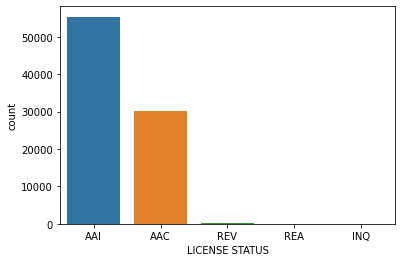

In [16]:
sns.countplot(x= df['LICENSE STATUS']);

**We obeseve here that the dataset is imbalanced dataset, hence would need to handle this as well**

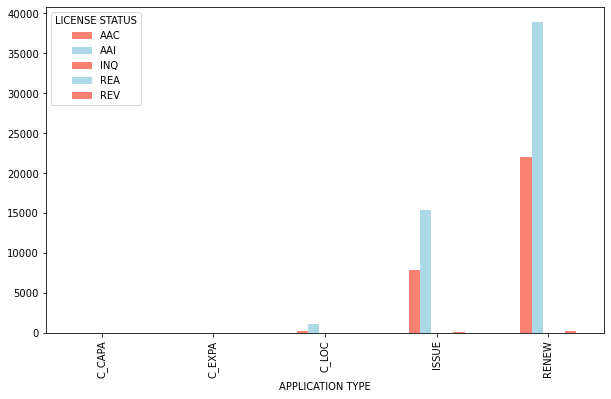

In [17]:
pd.crosstab(df['APPLICATION TYPE'], df['LICENSE STATUS']).plot(kind="bar", figsize=(10, 6), color=["salmon", "lightblue"]);

In [18]:
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


# Data Preprocessing

In [22]:
df.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [23]:
# Columns which don't contribute much , dropping them 
# ID, LICENSE ID  as they are just random number
# ADDRESS as doen't contribute much
# WARD PRECINCT as its combination of WARD and PRECINCT
# SSA,APPLICATION CREATED DATE,LICENSE STATUS CHANGE DATE as don't have much data and contribute much
# LOCATION as its combination of latitude and longitude

drop_col =['ID', 'LICENSE ID','ADDRESS','WARD PRECINCT','SSA','APPLICATION CREATED DATE','LICENSE STATUS CHANGE DATE','LOCATION']

In [24]:
df.drop(columns=drop_col,inplace =True)
df

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LATITUDE,LONGITUDE,LICENSE STATUS
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,41.843613,-87.714618,AAI
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,41.961132,-87.699626,AAC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,AAI
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,AAI
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,266103,3,"GOODHEALTH MEDICAL PRODUCTS, INC.","GOODHEALTH MEDICAL PRODUCTS, INC.",CHICAGO,IL,60652.0,18.0,14.0,8.0,1010,Limited Business License,1743194.0,RENEW,2007-06-21T00:00:00,2007-09-12T00:00:00,N,2007-08-16T00:00:00,2009-11-15T00:00:00,2007-09-12T00:00:00,2007-09-18T00:00:00,41.749842,-87.688733,NaN
57235,63376,180,INTERPARK LLC,INTERPARK,CHICAGO,IL,60654.0,42.0,22.0,18.0,1002,Accessory Garage,2032383.0,RENEW,2016-05-15T00:00:00,2016-06-23T00:00:00,N,2016-07-16T00:00:00,2018-07-15T00:00:00,2016-06-23T00:00:00,2016-08-11T00:00:00,41.891055,-87.627898,NaN
57236,55051,1,YUN HEE HWANG,TOP CLEANERS,CHICAGO,IL,60657.0,44.0,9.0,19.0,1010,Limited Business License,40376.0,RENEW,2001-12-20T00:00:00,2002-01-18T00:00:00,N,2002-02-16T00:00:00,2003-02-15T00:00:00,2002-01-18T00:00:00,2002-01-22T00:00:00,41.943382,-87.659191,NaN
57237,357381,1,D. C. A. TOWING INCORPORATED,D. C. A. TOWING INCORPORATED,CHICAGO,IL,60638.0,23.0,18.0,8.0,1012,Home Occupation,2064176.0,RENEW,2012-09-14T00:00:00,2012-12-25T00:00:00,N,2012-11-16T00:00:00,2014-11-15T00:00:00,2012-12-25T00:00:00,2012-12-26T00:00:00,41.775710,-87.798009,NaN


In [25]:
df.head()

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LATITUDE,LONGITUDE,LICENSE STATUS
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,41.843613,-87.714618,AAI
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,41.961132,-87.699626,AAC
2,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,AAI
3,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,AAI
4,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,AAI


In [26]:
df.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME',
       'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'POLICE DISTRICT',
       'LICENSE CODE', 'LICENSE DESCRIPTION', 'LICENSE NUMBER',
       'APPLICATION TYPE', 'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LATITUDE', 'LONGITUDE', 'LICENSE STATUS'],
      dtype='object')

##  Handling Dates

In [27]:
date_col =['APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE','DATE ISSUED']

In [28]:
for i in date_col:
    df[i] = pd.to_datetime(df[i])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143134 entries, 0 to 57238
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   ACCOUNT NUMBER                     143134 non-null  int64         
 1   SITE NUMBER                        143134 non-null  int64         
 2   LEGAL NAME                         143134 non-null  object        
 3   DOING BUSINESS AS NAME             143131 non-null  object        
 4   CITY                               143134 non-null  object        
 5   STATE                              143134 non-null  object        
 6   ZIP CODE                           143091 non-null  object        
 7   WARD                               92807 non-null   float64       
 8   PRECINCT                           84855 non-null   float64       
 9   POLICE DISTRICT                    87647 non-null   float64       
 10  LICENSE CODE         

In [30]:
df.head(2)

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LATITUDE,LONGITUDE,LICENSE STATUS
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,2002-06-28,2002-08-21,N,2002-08-16,2003-08-15,2002-08-21,2006-04-11,41.843613,-87.714618,AAI
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22,2005-11-03,N,2005-11-16,2006-11-15,2006-04-05,2006-06-12,41.961132,-87.699626,AAC


In [31]:
df['APPLICATION REQUIREMENTS COMPLETE YEAR'] = df['APPLICATION REQUIREMENTS COMPLETE'].dt.year
df['APPLICATION REQUIREMENTS COMPLETE MONTH'] = df['APPLICATION REQUIREMENTS COMPLETE'].dt.month
df['PAYMENT DATE YEAR'] = df['PAYMENT DATE'].dt.year
df['PAYMENT DATE MONTH'] = df['PAYMENT DATE'].dt.month
# df['LICENSE TERM START DATE YEAR'] = df['LICENSE TERM START DATE'].dt.year
# df['LICENSE TERM START DATE MONTH'] = df['LICENSE TERM START DATE'].dt.month
# df['LICENSE TERM EXPIRATION DATE YEAR'] = df['LICENSE TERM EXPIRATION DATE'].dt.year
# df['LICENSE TERM EXPIRATION DATE MONTH'] = df['LICENSE TERM EXPIRATION DATE'].dt.month
df['LICENSE APPROVED FOR ISSUANCE YEAR'] = df['LICENSE APPROVED FOR ISSUANCE'].dt.year
df['LICENSE APPROVED FOR ISSUANCE MONTH'] = df['LICENSE APPROVED FOR ISSUANCE'].dt.month
df['DATE ISSUED YEAR'] = df['DATE ISSUED'].dt.year
df['DATE ISSUED MONTH'] = df['DATE ISSUED'].dt.month

In [32]:
df['VALIDITY LICENSE'] = abs ( round((df['LICENSE TERM EXPIRATION DATE'] - df['LICENSE TERM START DATE']).dt.days / 365, 1) )

In [33]:
df.drop(columns=date_col,inplace=True)

In [34]:
df.head(2)

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,AAI,2002.0,6.0,2002.0,8.0,2002.0,8.0,2006,4,1.0
1,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,N,41.961132,-87.699626,AAC,2005.0,9.0,2005.0,11.0,2006.0,4.0,2006,6,1.0


##  Handling outliers

In [35]:
 df['VALIDITY LICENSE'].value_counts()

2.0     56022
1.0     51671
2.1      6374
0.9      3083
0.8      2888
        ...  
9.1         1
3.3         1
11.4        1
5.3         1
3.6         1
Name: VALIDITY LICENSE, Length: 64, dtype: int64

In [66]:
df['VALIDITY LICENSE'].unique()

array([1.        , 2.        , 1.1       , 0.        , 1.2       ,
       1.5       , 2.1       , 0.5       , 0.6       , 1.9       ,
       0.4       , 0.7       , 0.2       , 0.1       , 0.9       ,
       0.3       , 2.8       , 0.8       , 1.6       , 1.8       ,
       2.2       , 1.7       , 1.3       , 4.        , 3.        ,
       1.4       , 2.3       , 4.1       , 5.4       , 5.2       ,
       6.5       , 3.8       , 7.9       , 5.6       , 7.        ,
       5.3       , 2.4       , 3.2       , 6.2       , 2.9       ,
       6.        , 2.7       , 7.4       , 2.5       , 3.34283244,
       4.2       , 4.7       , 3.3       , 7.2       , 3.9       ,
       4.6       , 4.5       , 3.1       , 6.1       , 2.6       ,
       5.8       , 7.6       , 5.        , 3.4       , 3.6       ])

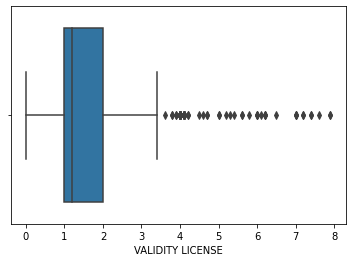

In [37]:
df[df['VALIDITY LICENSE'] > 8]

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE
46514,21696,2,M SULLIVAN HEATING INC,M SULLIVAN HEATING,EVERGREEN PARK,IL,60852,NaN,NaN,NaN,1010,Limited Business License,1095249.0,C_LOC,N,NaN,NaN,AAI,2000.0,11.0,NaN,NaN,2002.0,9.0,2010,5,8.2
51994,21818,3,PRECISION CONTRACTING SERVICES,PRESCISION CONTRACTING SERVICES,DES PLAINES,IL,60018,NaN,NaN,NaN,1010,Limited Business License,1121240.0,C_LOC,N,NaN,NaN,AAI,2001.0,2.0,2001.0,2.0,2003.0,1.0,2013,7,11.4
53422,51997,1,ELLIS CONTRACTORS INC,ELLIS CONTRACTORS INC,ELK GROVE,IL,60007,NaN,NaN,NaN,1010,Limited Business License,18888.0,ISSUE,N,NaN,NaN,AAI,2000.0,6.0,NaN,NaN,2003.0,12.0,2006,4,9.1
66683,213133,1,MICHAEL BRUCE VLASEK,MIKE VLASEK INC,ORLAND PARK,IL,60462,NaN,NaN,NaN,1011,Home Repair,1140502.0,ISSUE,N,NaN,NaN,AAI,2001.0,4.0,2001.0,4.0,2001.0,9.0,2010,5,8.2
83282,254231,1,A V J CONSTRUCTIOIN INC.,"AVJ CONSTRUCTION ,INC.",ELMWOOD PARK,IL,60707,NaN,NaN,NaN,1010,Limited Business License,1300260.0,ISSUE,N,NaN,NaN,AAI,2002.0,10.0,2002.0,10.0,2002.0,11.0,2002,11,101.9
44889,86301,2,"WHERE'S THE DUKE, INC.",BANANA JOE'S,CHICAGO,IL,60622.0,27.0,46.0,18.0,1006,Retail Food Establishment,54507.0,ISSUE,N,41.909896,-87.652772,NaN,2000.0,6.0,2002.0,7.0,2003.0,12.0,2006,5,9.0


In [38]:
df['VALIDITY LICENSE'].mean() + 3*df['VALIDITY LICENSE'].std()

3.3428324387744324

In [39]:
upper_limit= df['VALIDITY LICENSE'].mean() + 3*df['VALIDITY LICENSE'].std()
# upper_limit = per75 + 1.5 * (df['VALIDITY LICENSE'].quantile(0.75) - df['VALIDITY LICENSE'].quantile(0.25))

df['VALIDITY LICENSE'] = np.where(df['VALIDITY LICENSE'] > 8, upper_limit , df['VALIDITY LICENSE'])

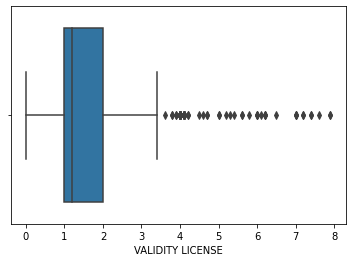

In [86]:
sns.boxplot(x= df['VALIDITY LICENSE']);

##  Handling Missing Values

In [41]:
 df.isnull().sum()[ df.isnull().sum()/len(df) > 0.000000 ] 

DOING BUSINESS AS NAME                         3
ZIP CODE                                      43
WARD                                       50327
PRECINCT                                   58279
POLICE DISTRICT                            55487
LICENSE NUMBER                                 1
LATITUDE                                   48156
LONGITUDE                                  48156
LICENSE STATUS                             57239
APPLICATION REQUIREMENTS COMPLETE YEAR       642
APPLICATION REQUIREMENTS COMPLETE MONTH      642
PAYMENT DATE YEAR                           2340
PAYMENT DATE MONTH                          2340
LICENSE APPROVED FOR ISSUANCE YEAR          9168
LICENSE APPROVED FOR ISSUANCE MONTH         9168
VALIDITY LICENSE                             346
dtype: int64

In [42]:
df.head(1)

,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE
0,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,AAI,2002.0,6.0,2002.0,8.0,2002.0,8.0,2006,4,1.0


In [43]:
#replacing them by 0 for avoiding skewness
# df['WARD'] = df['WARD'].fillna(df['WARD'].mode()[0])  

df['WARD'] = df['WARD'].fillna(0)  
df['PRECINCT'] = df['PRECINCT'].fillna(0) 
df['POLICE DISTRICT'] = df['POLICE DISTRICT'].fillna(0) 
df['LICENSE NUMBER'] = df['LICENSE NUMBER'].fillna(0) 


In [44]:
#replacing them by  mean
df['LATITUDE'] = df['LATITUDE'].fillna(round(df['LATITUDE'].mean()))  
df['LONGITUDE'] = df['LONGITUDE'].fillna(round(df['LONGITUDE'].mean()))  


In [45]:
#replacing them by rounded mean
df['VALIDITY LICENSE'] = df['VALIDITY LICENSE'].fillna(round(df['VALIDITY LICENSE'].mean()))  
df['APPLICATION REQUIREMENTS COMPLETE YEAR'] = df['APPLICATION REQUIREMENTS COMPLETE YEAR'].fillna(round(df['APPLICATION REQUIREMENTS COMPLETE YEAR'].mean())) 
df['APPLICATION REQUIREMENTS COMPLETE MONTH'] = df['APPLICATION REQUIREMENTS COMPLETE MONTH'].fillna(round(df['APPLICATION REQUIREMENTS COMPLETE MONTH'].mean()))  
df['PAYMENT DATE YEAR'] = df['PAYMENT DATE YEAR'].fillna(round(df['PAYMENT DATE YEAR'].mean()))  
df['PAYMENT DATE MONTH'] = df['PAYMENT DATE MONTH'].fillna(round(df['PAYMENT DATE MONTH'].mean()))  
# df['LICENSE TERM START DATE YEAR'] = df['LICENSE TERM START DATE YEAR'].fillna(round(df['LICENSE TERM START DATE YEAR'].mean()))  
# df['LICENSE TERM START DATE MONTH'] = df['LICENSE TERM START DATE MONTH'].fillna(round(df['LICENSE TERM START DATE MONTH'].mean()))  
# df['LICENSE TERM EXPIRATION DATE YEAR'] = df['LICENSE TERM EXPIRATION DATE YEAR'].fillna(round(df['LICENSE TERM EXPIRATION DATE YEAR'].mean()))  
# df['LICENSE TERM EXPIRATION DATE MONTH'] = df['LICENSE TERM EXPIRATION DATE MONTH'].fillna(round(df['LICENSE TERM EXPIRATION DATE MONTH'].mean()))  
df['LICENSE APPROVED FOR ISSUANCE YEAR'] = df['LICENSE APPROVED FOR ISSUANCE YEAR'].fillna(round(df['LICENSE APPROVED FOR ISSUANCE YEAR'].mean()))  
df['LICENSE APPROVED FOR ISSUANCE MONTH'] = df['LICENSE APPROVED FOR ISSUANCE MONTH'].fillna(round(df['LICENSE APPROVED FOR ISSUANCE MONTH'].mean()))  


In [46]:
# replaceing by NONE
df['ZIP CODE'] = df['ZIP CODE'].fillna('NONE')  
df['DOING BUSINESS AS NAME'] = df['DOING BUSINESS AS NAME'].fillna("NONE")  


In [47]:
df.isnull().sum()

ACCOUNT NUMBER                                 0
SITE NUMBER                                    0
LEGAL NAME                                     0
DOING BUSINESS AS NAME                         0
CITY                                           0
STATE                                          0
ZIP CODE                                       0
WARD                                           0
PRECINCT                                       0
POLICE DISTRICT                                0
LICENSE CODE                                   0
LICENSE DESCRIPTION                            0
LICENSE NUMBER                                 0
APPLICATION TYPE                               0
CONDITIONAL APPROVAL                           0
LATITUDE                                       0
LONGITUDE                                      0
LICENSE STATUS                             57239
APPLICATION REQUIREMENTS COMPLETE YEAR         0
APPLICATION REQUIREMENTS COMPLETE MONTH        0
PAYMENT DATE YEAR   

In [48]:
df.dtypes

ACCOUNT NUMBER                               int64
SITE NUMBER                                  int64
LEGAL NAME                                  object
DOING BUSINESS AS NAME                      object
CITY                                        object
STATE                                       object
ZIP CODE                                    object
WARD                                       float64
PRECINCT                                   float64
POLICE DISTRICT                            float64
LICENSE CODE                                 int64
LICENSE DESCRIPTION                         object
LICENSE NUMBER                             float64
APPLICATION TYPE                            object
CONDITIONAL APPROVAL                        object
LATITUDE                                   float64
LONGITUDE                                  float64
LICENSE STATUS                              object
APPLICATION REQUIREMENTS COMPLETE YEAR     float64
APPLICATION REQUIREMENTS COMPLE

## Handling Text columns

In [49]:
df['LEGAL NAME'] = df['LEGAL NAME'].apply(lambda x: x.upper())
df['DOING BUSINESS AS NAME'] = df['DOING BUSINESS AS NAME'].apply(lambda x: x.upper())

**Type of BUSINESS - INC, CORPORATION, LLC, LIMITED or PRIVATE**

In [50]:
df['LEGAL BUSINESS'] = 'OTHER'

In [51]:
df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('CO'), 'CORP', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('CORP'), 'CORP', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('CORPORATION'), 'CORP', df['LEGAL BUSINESS'])

df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('CO'), 'CORP', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('CORP'), 'CORP', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('CORPORATION'), 'CORP', df['LEGAL BUSINESS'])



df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('LLC'), 'LLC', df['LEGAL BUSINESS'])

df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('LLC'), 'LLC', df['LEGAL BUSINESS'])

df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('INC'), 'INC', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'), 'INC', df['LEGAL BUSINESS'])

df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('INC'), 'INC', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('INCORPORATED'), 'INC', df['LEGAL BUSINESS'])

df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('LTD'), 'LTD', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['LEGAL NAME'].str.contains('LIMITED'), 'LTD', df['LEGAL BUSINESS'])

df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('LTD'), 'LTD', df['LEGAL BUSINESS'])
df['LEGAL BUSINESS'] = np.where(df['DOING BUSINESS AS NAME'].str.contains('LIMITED'), 'LTD', df['LEGAL BUSINESS'])

In [52]:
df['LEGAL BUSINESS'].value_counts()

INC      63709
OTHER    41873
CORP     22880
LLC      11381
LTD       3291
Name: LEGAL BUSINESS, dtype: int64

In [53]:
#dropping them
df.drop(columns =['LEGAL NAME','DOING BUSINESS AS NAME'],inplace = True)

In [54]:
df.head(2)

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,LEGAL BUSINESS
0,32811,1,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,AAI,2002.0,6.0,2002.0,8.0,2002.0,8.0,2006,4,1.0,OTHER
1,262311,29,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,N,41.961132,-87.699626,AAC,2005.0,9.0,2005.0,11.0,2006.0,4.0,2006,6,1.0,INC


In [55]:
df['LICENSE DESCRIPTION'].value_counts()

Limited Business License                    78172
Home Repair                                 12493
Retail Food Establishment                    7109
Home Occupation                              5830
Peddler, non-food                            3446
                                            ...  
Guard Dog Service                               1
Transportation Network Provider                 1
Shared Housing Unit Operator                    1
Airport Pushcart Liquor Midway - Class A        1
Navy Pier Kiosk License                         1
Name: LICENSE DESCRIPTION, Length: 129, dtype: int64

##  Encoding the dataset for model to interpret

In [56]:
df['APPLICATION TYPE'].value_counts()

RENEW     105221
ISSUE      35770
C_LOC       2081
C_EXPA        33
C_CAPA        24
C_SBA          5
Name: APPLICATION TYPE, dtype: int64

In [57]:
# creating dummies for - APPLICATION TYPE , LEGAL BUSINESS
df_app = pd.get_dummies(df['APPLICATION TYPE'] , drop_first=1)
df_lic = pd.get_dummies(df['LEGAL BUSINESS'] , drop_first=1)
df_approve = pd.get_dummies(df['CONDITIONAL APPROVAL'] , drop_first=1)

In [58]:
df=pd.concat([df,df_app,df_lic,df_approve],axis=1)
df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,CONDITIONAL APPROVAL,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,LEGAL BUSINESS,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,32811,1,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,RENEW,N,41.843613,-87.714618,AAI,2002.0,6.0,2002.0,8.0,2002.0,8.0,2006,4,1.0,OTHER,0,0,0,0,1,0,0,0,1,0
1,262311,29,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,N,41.961132,-87.699626,AAC,2005.0,9.0,2005.0,11.0,2006.0,4.0,2006,6,1.0,INC,0,0,0,0,1,1,0,0,0,0
2,345008,1,HIGHLAND,IL,60035,0.0,0.0,0.0,1011,Home Repair,1980233.0,ISSUE,N,42.000000,-88.000000,AAI,2009.0,7.0,2009.0,7.0,2009.0,7.0,2009,7,2.0,INC,0,0,0,1,0,1,0,0,0,0
3,273121,1,LEMONT,IL,60439,0.0,0.0,0.0,1010,Limited Business License,1476582.0,ISSUE,N,42.000000,-88.000000,AAI,2004.0,2.0,2004.0,2.0,2004.0,2.0,2004,2,1.0,CORP,0,0,0,1,0,0,0,0,0,0
4,213785,1,WAUKEGAN,IL,60087,0.0,0.0,0.0,1010,Limited Business License,1141408.0,RENEW,N,42.000000,-88.000000,AAI,2008.0,3.0,2008.0,6.0,2008.0,6.0,2008,6,2.0,OTHER,0,0,0,0,1,0,0,0,1,0


In [59]:
df.drop(['APPLICATION TYPE','LEGAL BUSINESS','CONDITIONAL APPROVAL'] ,axis=1,inplace=True)

In [60]:
df.head()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,32811,1,CHICAGO,IL,60623,22.0,28.0,10.0,1010,Limited Business License,35342.0,41.843613,-87.714618,AAI,2002.0,6.0,2002.0,8.0,2002.0,8.0,2006,4,1.0,0,0,0,0,1,0,0,0,1,0
1,262311,29,CHICAGO,IL,60618,33.0,23.0,17.0,1315,Mobile Food Dispenser,1358463.0,41.961132,-87.699626,AAC,2005.0,9.0,2005.0,11.0,2006.0,4.0,2006,6,1.0,0,0,0,0,1,1,0,0,0,0
2,345008,1,HIGHLAND,IL,60035,0.0,0.0,0.0,1011,Home Repair,1980233.0,42.000000,-88.000000,AAI,2009.0,7.0,2009.0,7.0,2009.0,7.0,2009,7,2.0,0,0,0,1,0,1,0,0,0,0
3,273121,1,LEMONT,IL,60439,0.0,0.0,0.0,1010,Limited Business License,1476582.0,42.000000,-88.000000,AAI,2004.0,2.0,2004.0,2.0,2004.0,2.0,2004,2,1.0,0,0,0,1,0,0,0,0,0,0
4,213785,1,WAUKEGAN,IL,60087,0.0,0.0,0.0,1010,Limited Business License,1141408.0,42.000000,-88.000000,AAI,2008.0,3.0,2008.0,6.0,2008.0,6.0,2008,6,2.0,0,0,0,0,1,0,0,0,1,0


In [61]:
#encoding rest of the features
df['CITY'] = df['CITY'].astype("category").cat.as_ordered().cat.codes
df['STATE'] = df['STATE'].astype("category").cat.as_ordered().cat.codes
df['ZIP CODE'] = df['ZIP CODE'].astype("category").cat.as_ordered().cat.codes
df['LICENSE DESCRIPTION'] = df['LICENSE DESCRIPTION'].astype("category").cat.as_ordered().cat.codes
df['LICENSE STATUS'] = df['LICENSE STATUS'].astype("category").cat.as_ordered().cat.codes

In [62]:
df

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,32811,1,211,16,1529,22.0,28.0,10.0,1010,55,35342.0,41.843613,-87.714618,1,2002.0,6.0,2002.0,8.0,2002.0,8.0,2006,4,1.0,0,0,0,0,1,0,0,0,1,0
1,262311,29,211,16,1524,33.0,23.0,17.0,1315,61,1358463.0,41.961132,-87.699626,0,2005.0,9.0,2005.0,11.0,2006.0,4.0,2006,6,1.0,0,0,0,0,1,1,0,0,0,0
2,345008,1,498,16,1232,0.0,0.0,0.0,1011,40,1980233.0,42.000000,-88.000000,1,2009.0,7.0,2009.0,7.0,2009.0,7.0,2009,7,2.0,0,0,0,1,0,1,0,0,0,0
3,273121,1,624,16,1404,0.0,0.0,0.0,1010,55,1476582.0,42.000000,-88.000000,1,2004.0,2.0,2004.0,2.0,2004.0,2.0,2004,2,1.0,0,0,0,1,0,0,0,0,0,0
4,213785,1,1227,16,1273,0.0,0.0,0.0,1010,55,1141408.0,42.000000,-88.000000,1,2008.0,3.0,2008.0,6.0,2008.0,6.0,2008,6,2.0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,266103,3,211,16,301,18.0,14.0,8.0,1010,55,1743194.0,41.749842,-87.688733,-1,2007.0,6.0,2007.0,9.0,2007.0,9.0,2007,9,2.3,0,0,0,0,1,1,0,0,0,0
57235,63376,180,211,16,303,42.0,22.0,18.0,1002,0,2032383.0,41.891055,-87.627898,-1,2016.0,5.0,2016.0,6.0,2016.0,6.0,2016,8,2.0,0,0,0,0,1,0,1,0,0,0
57236,55051,1,211,16,306,44.0,9.0,19.0,1010,55,40376.0,41.943382,-87.659191,-1,2001.0,12.0,2002.0,1.0,2002.0,1.0,2002,1,1.0,0,0,0,0,1,0,0,0,1,0
57237,357381,1,211,16,289,23.0,18.0,8.0,1012,39,2064176.0,41.775710,-87.798009,-1,2012.0,9.0,2012.0,12.0,2012.0,12.0,2012,12,2.0,0,0,0,0,1,1,0,0,0,0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143134 entries, 0 to 57238
Data columns (total 33 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   ACCOUNT NUMBER                           143134 non-null  int64  
 1   SITE NUMBER                              143134 non-null  int64  
 2   CITY                                     143134 non-null  int16  
 3   STATE                                    143134 non-null  int8   
 4   ZIP CODE                                 143134 non-null  int16  
 5   WARD                                     143134 non-null  float64
 6   PRECINCT                                 143134 non-null  float64
 7   POLICE DISTRICT                          143134 non-null  float64
 8   LICENSE CODE                             143134 non-null  int64  
 9   LICENSE DESCRIPTION                      143134 non-null  int16  
 10  LICENSE NUMBER                   

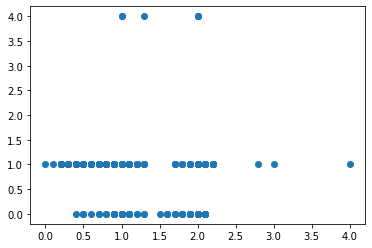

In [68]:
fig, ax = plt.subplots()
ax.scatter(df["VALIDITY LICENSE"][:1000], df["LICENSE STATUS"][:1000])

<AxesSubplot:ylabel='Frequency'>

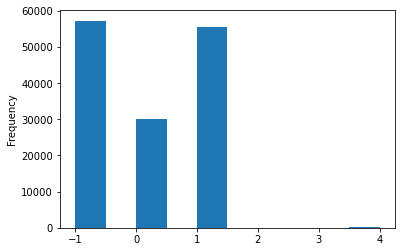

In [69]:
df["LICENSE STATUS"].plot.hist()

In [149]:
df['VALIDITY LICENSE'].unique()

array([1.        , 2.        , 1.1       , 0.        , 1.2       ,
       1.5       , 2.1       , 0.5       , 0.6       , 1.9       ,
       0.4       , 0.7       , 0.2       , 0.1       , 0.9       ,
       0.3       , 2.8       , 0.8       , 1.6       , 1.8       ,
       2.2       , 1.7       , 1.3       , 4.        , 3.        ,
       1.4       , 2.3       , 4.1       , 5.4       , 5.2       ,
       6.5       , 3.8       , 7.9       , 5.6       , 7.        ,
       5.3       , 2.4       , 3.2       , 6.2       , 2.9       ,
       6.        , 2.7       , 7.4       , 2.5       , 3.34283244,
       4.2       , 4.7       , 3.3       , 7.2       , 3.9       ,
       4.6       , 4.5       , 3.1       , 6.1       , 2.6       ,
       5.8       , 7.6       , 5.        , 3.4       , 3.6       ])

##  Creating another copy of dataset

In [150]:
df2 =df.copy()

#  Feature Selection

In [151]:
df2.corr()

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE YEAR,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE YEAR,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE YEAR,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
ACCOUNT NUMBER,1.000000,-0.128949,0.012486,0.023792,0.033736,-0.022200,-0.059614,-0.081006,0.098406,0.071158,0.796806,-0.002457,-0.012753,0.013686,0.368675,-0.108944,0.355794,0.109373,0.351842,0.046264,0.359515,0.105823,0.247473,-0.001403,0.003792,0.005848,0.449365,-0.441918,-0.060305,0.194173,-0.050317,0.043732,0.029010
SITE NUMBER,-0.128949,1.000000,-0.061767,-0.014827,-0.057994,0.069605,0.004206,0.057504,0.028914,0.017988,0.047479,-0.056411,0.094732,-0.077268,0.085753,-0.075791,0.082885,0.001979,0.084789,-0.012553,0.083835,0.007772,0.030954,-0.000427,-0.004857,-0.000473,-0.012326,0.013399,0.007888,0.036284,-0.015415,-0.068259,0.003950
CITY,0.012486,-0.061767,1.000000,0.099821,0.304440,-0.498023,-0.135177,-0.458391,-0.040969,-0.061620,-0.005184,0.408699,-0.595947,0.474961,-0.165177,0.075624,-0.149742,-0.218276,-0.142846,-0.149699,-0.149468,-0.198578,-0.103713,-0.007343,0.030746,-0.002858,0.035352,-0.042552,0.022938,-0.044327,-0.025887,-0.036921,-0.014123
STATE,0.023792,-0.014827,0.099821,1.000000,0.002283,-0.108706,-0.029533,-0.099841,0.031574,0.026165,0.009344,0.090927,-0.129286,0.092505,-0.019724,0.009146,-0.015684,-0.039924,-0.010850,-0.034546,-0.017929,-0.035098,-0.016068,-0.001602,-0.003378,-0.000624,0.021275,-0.019854,-0.003979,0.012916,-0.012268,-0.006275,-0.003082
ZIP CODE,0.033736,-0.057994,0.304440,0.002283,1.000000,-0.341979,-0.019842,-0.360093,-0.130961,-0.105641,0.018138,0.298125,-0.433193,0.838673,-0.143056,0.061600,-0.130518,-0.147080,-0.129360,-0.097162,-0.135279,-0.133028,-0.049077,-0.012892,0.012574,-0.007021,0.059593,-0.061137,0.001543,-0.044551,-0.020201,-0.006578,-0.025570
WARD,-0.022200,0.069605,-0.498023,-0.108706,-0.341979,1.000000,0.169656,0.701712,0.034680,0.056461,0.001836,-0.166295,0.647126,-0.541792,0.190302,-0.099189,0.173390,0.214889,0.163577,0.143443,0.173237,0.194362,0.121604,0.018910,-0.029603,-0.002170,-0.059897,0.065988,-0.012030,0.091429,0.045267,0.002951,0.018735
PRECINCT,-0.059614,0.004206,-0.135177,-0.029533,-0.019842,0.169656,1.000000,0.242262,0.000249,-0.004515,-0.068313,-0.095649,0.174614,-0.060426,-0.015012,-0.002231,-0.021688,0.079133,-0.022625,0.060437,-0.022160,0.072794,-0.022134,0.000315,-0.008572,0.000661,-0.044694,0.046122,-0.029000,-0.013136,0.012696,0.044680,0.000336
POLICE DISTRICT,-0.081006,0.057504,-0.458391,-0.099841,-0.360093,0.701712,0.242262,1.000000,0.058438,0.080083,-0.072736,-0.167917,0.557153,-0.558038,0.107482,-0.023148,0.096193,0.184584,0.085305,0.129849,0.096306,0.167448,0.078929,0.017190,-0.028066,0.003073,-0.096136,0.101080,-0.020818,0.004964,0.036548,0.059667,0.014984
LICENSE CODE,0.098406,0.028914,-0.040969,0.031574,-0.130961,0.034680,0.000249,0.058438,1.000000,0.295060,0.134160,-0.028665,0.046420,-0.141191,0.152165,-0.036091,0.153475,0.054039,0.151994,0.039490,0.165213,0.079027,0.057408,0.002884,-0.021578,0.017370,0.111893,-0.104567,-0.046154,0.029891,-0.008634,0.087669,0.012302
LICENSE DESCRIPTION,0.071158,0.017988,-0.061620,0.026165,-0.105641,0.056461,-0.004515,0.080083,0.295060,1.000000,0.064306,-0.054963,0.083824,-0.113731,0.071628,-0.033113,0.072404,0.042909,0.075591,0.022267,0.068962,0.051833,0.022999,0.003705,-0.034701,0.000755,0.080430,-0.069346,-0.012668,0.025073,-0.007714,0.071882,-0.003494


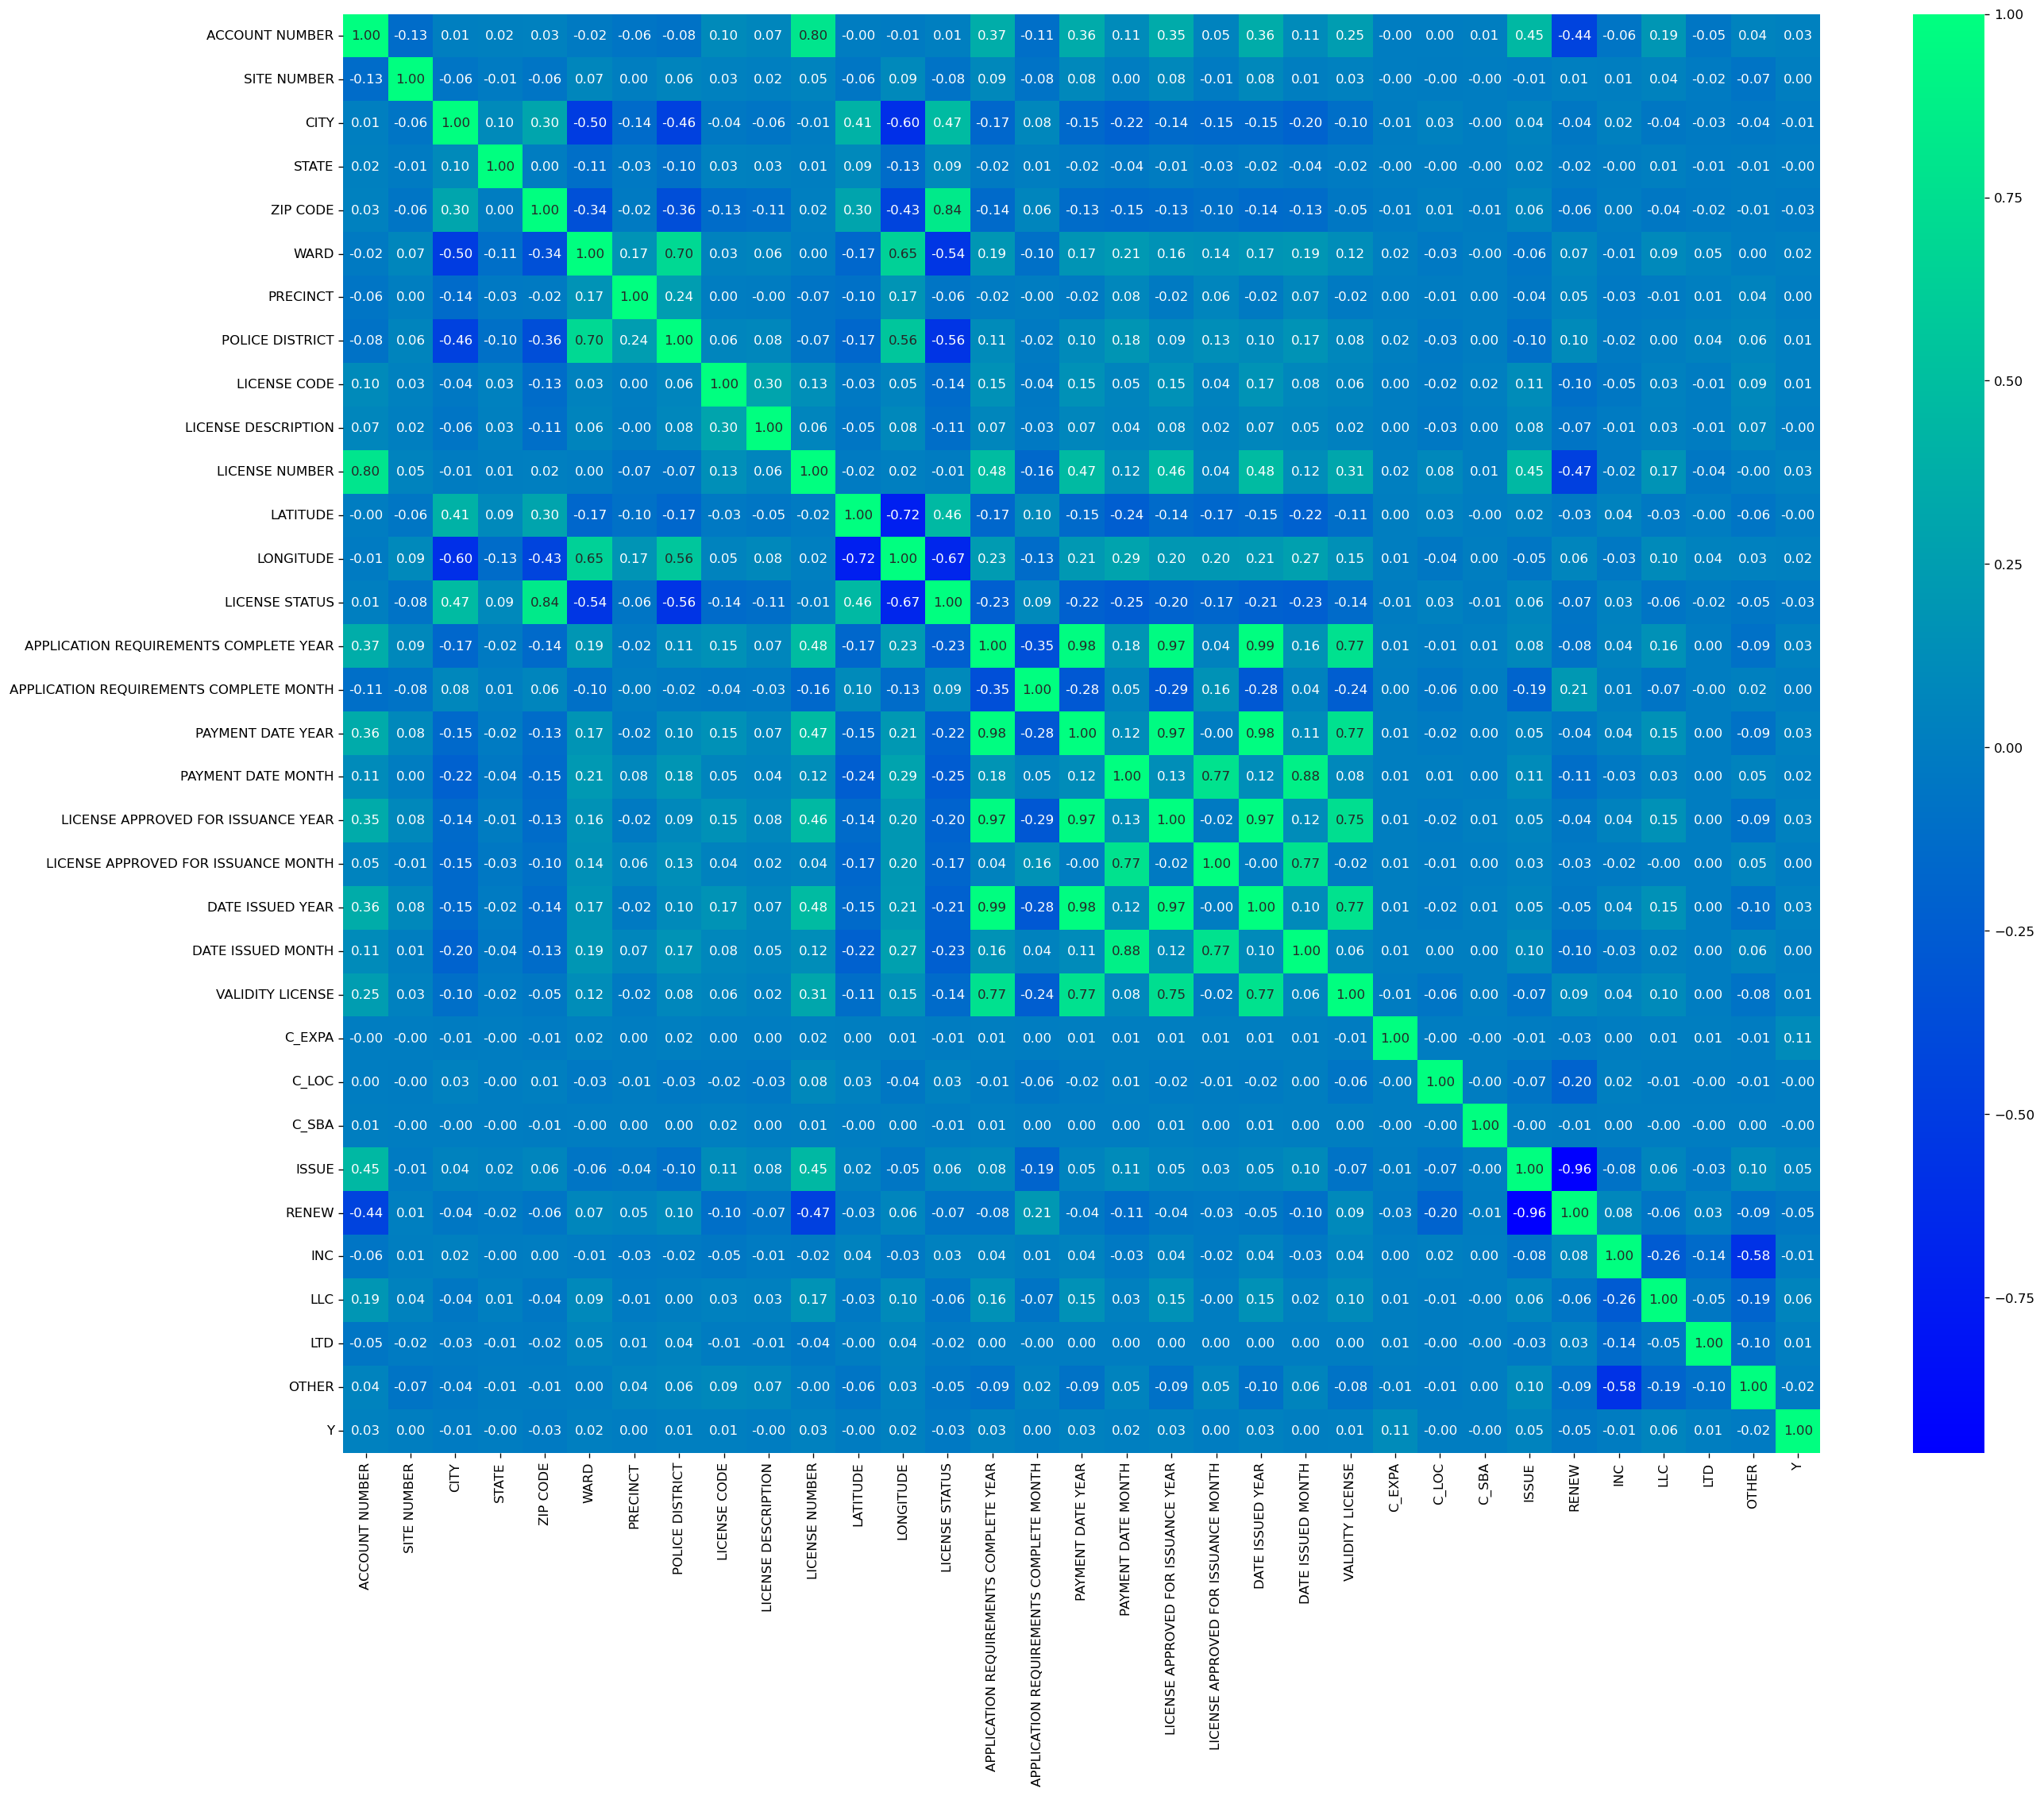

In [152]:
fig , ax = plt.subplots(figsize = (25,20),dpi=120)

ax = sns.heatmap(df2.corr(), annot =True, fmt='.2f', cmap ='winter' )

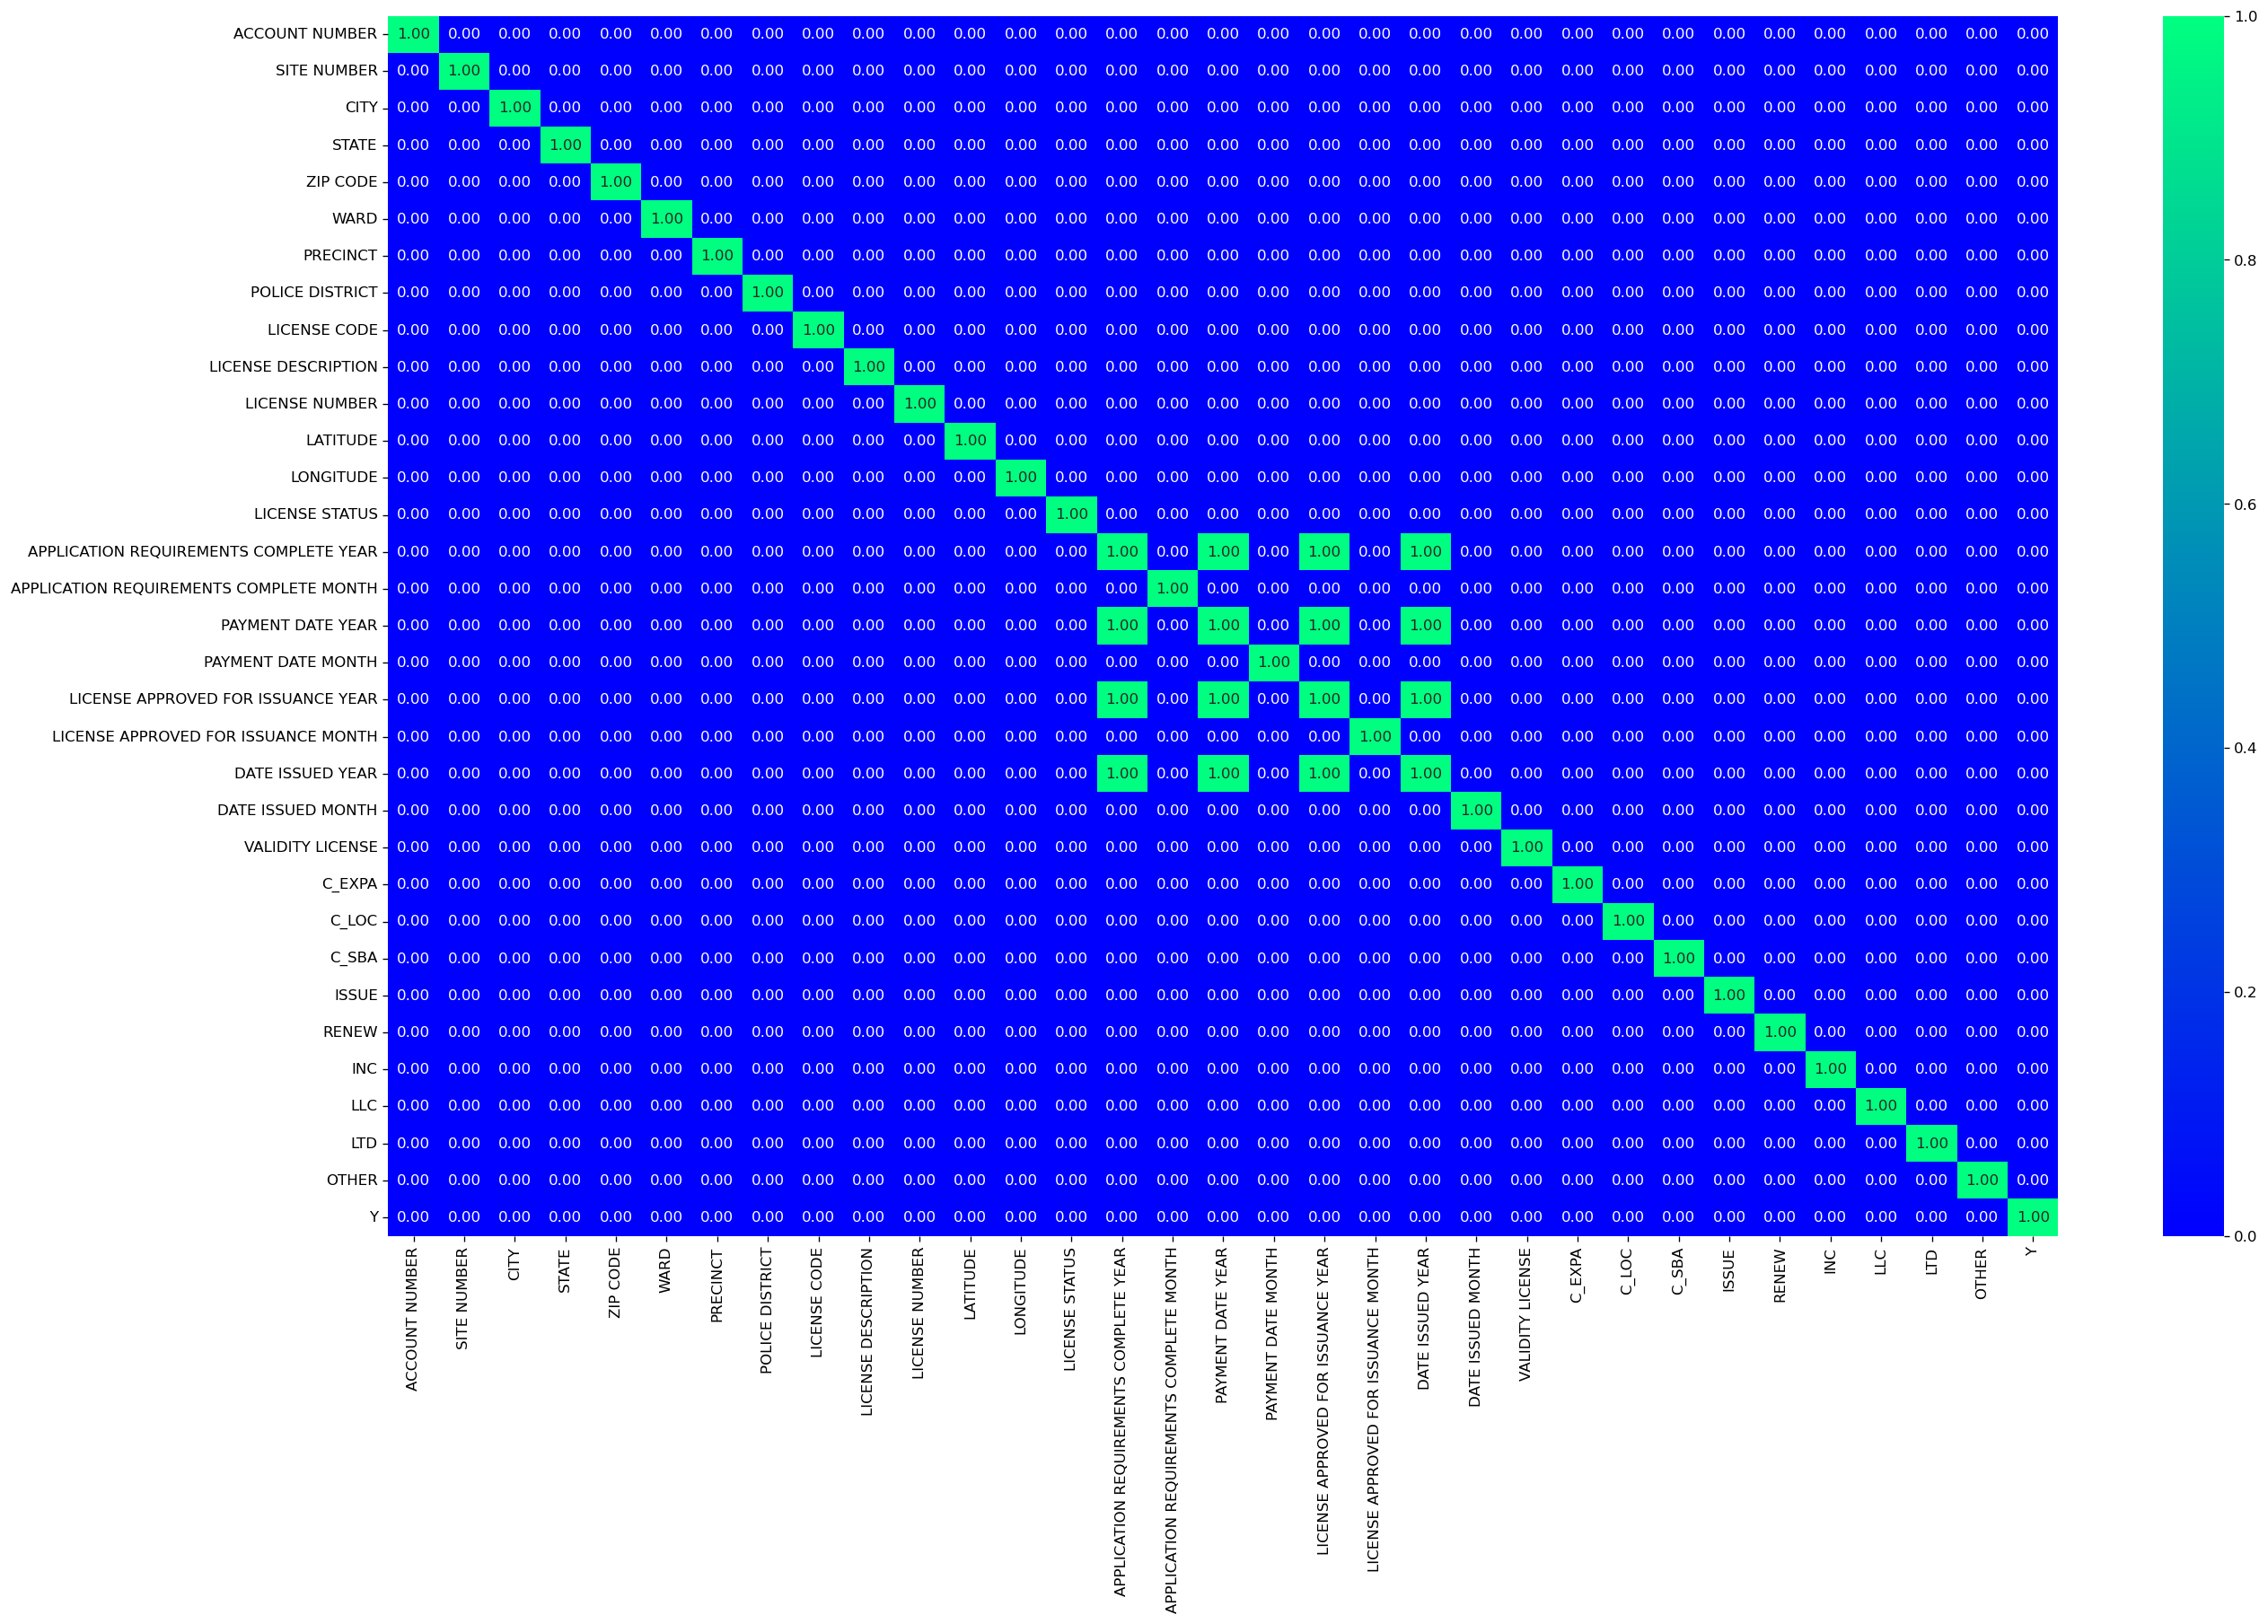

In [153]:
fig , ax = plt.subplots(figsize = (25,15),dpi=120)

ax = sns.heatmap(df2.corr() >0.9 , annot =True, fmt='.2f', cmap ='winter' )

**We can see here that few multicolinier columns exists hence removing those columns**

## Handling multicoliner variables

In [154]:
corr_matrix = df.corr().abs()
high_corr_var=np.where(corr_matrix>0.9)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [155]:
high_corr_var

[('APPLICATION REQUIREMENTS COMPLETE YEAR', 'PAYMENT DATE YEAR'),
 ('APPLICATION REQUIREMENTS COMPLETE YEAR',
  'LICENSE APPROVED FOR ISSUANCE YEAR'),
 ('APPLICATION REQUIREMENTS COMPLETE YEAR', 'DATE ISSUED YEAR'),
 ('PAYMENT DATE YEAR', 'LICENSE APPROVED FOR ISSUANCE YEAR'),
 ('PAYMENT DATE YEAR', 'DATE ISSUED YEAR'),
 ('LICENSE APPROVED FOR ISSUANCE YEAR', 'DATE ISSUED YEAR'),
 ('ISSUE', 'RENEW')]

In [156]:
df2.corr()['LICENSE APPROVED FOR ISSUANCE YEAR']>0.9

ACCOUNT NUMBER                             False
SITE NUMBER                                False
CITY                                       False
STATE                                      False
ZIP CODE                                   False
WARD                                       False
PRECINCT                                   False
POLICE DISTRICT                            False
LICENSE CODE                               False
LICENSE DESCRIPTION                        False
LICENSE NUMBER                             False
LATITUDE                                   False
LONGITUDE                                  False
LICENSE STATUS                             False
APPLICATION REQUIREMENTS COMPLETE YEAR      True
APPLICATION REQUIREMENTS COMPLETE MONTH    False
PAYMENT DATE YEAR                           True
PAYMENT DATE MONTH                         False
LICENSE APPROVED FOR ISSUANCE YEAR          True
LICENSE APPROVED FOR ISSUANCE MONTH        False
DATE ISSUED YEAR    

In [157]:
#dropping those highly correalted features
corr_list = ['PAYMENT DATE YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED FOR ISSUANCE YEAR']
df2.drop(corr_list, axis=1,inplace =True)
df2

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,32811,1,211,16,1529,22.0,28.0,10.0,1010,55,35342.0,41.843613,-87.714618,1,6.0,8.0,8.0,2006,4,1.0,0,0,0,0,1,0,0,0,1,0
1,262311,29,211,16,1524,33.0,23.0,17.0,1315,61,1358463.0,41.961132,-87.699626,0,9.0,11.0,4.0,2006,6,1.0,0,0,0,0,1,1,0,0,0,0
2,345008,1,498,16,1232,0.0,0.0,0.0,1011,40,1980233.0,42.000000,-88.000000,1,7.0,7.0,7.0,2009,7,2.0,0,0,0,1,0,1,0,0,0,0
3,273121,1,624,16,1404,0.0,0.0,0.0,1010,55,1476582.0,42.000000,-88.000000,1,2.0,2.0,2.0,2004,2,1.0,0,0,0,1,0,0,0,0,0,0
4,213785,1,1227,16,1273,0.0,0.0,0.0,1010,55,1141408.0,42.000000,-88.000000,1,3.0,6.0,6.0,2008,6,2.0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,266103,3,211,16,301,18.0,14.0,8.0,1010,55,1743194.0,41.749842,-87.688733,-1,6.0,9.0,9.0,2007,9,2.3,0,0,0,0,1,1,0,0,0,0
57235,63376,180,211,16,303,42.0,22.0,18.0,1002,0,2032383.0,41.891055,-87.627898,-1,5.0,6.0,6.0,2016,8,2.0,0,0,0,0,1,0,1,0,0,0
57236,55051,1,211,16,306,44.0,9.0,19.0,1010,55,40376.0,41.943382,-87.659191,-1,12.0,1.0,1.0,2002,1,1.0,0,0,0,0,1,0,0,0,1,0
57237,357381,1,211,16,289,23.0,18.0,8.0,1012,39,2064176.0,41.775710,-87.798009,-1,9.0,12.0,12.0,2012,12,2.0,0,0,0,0,1,1,0,0,0,0


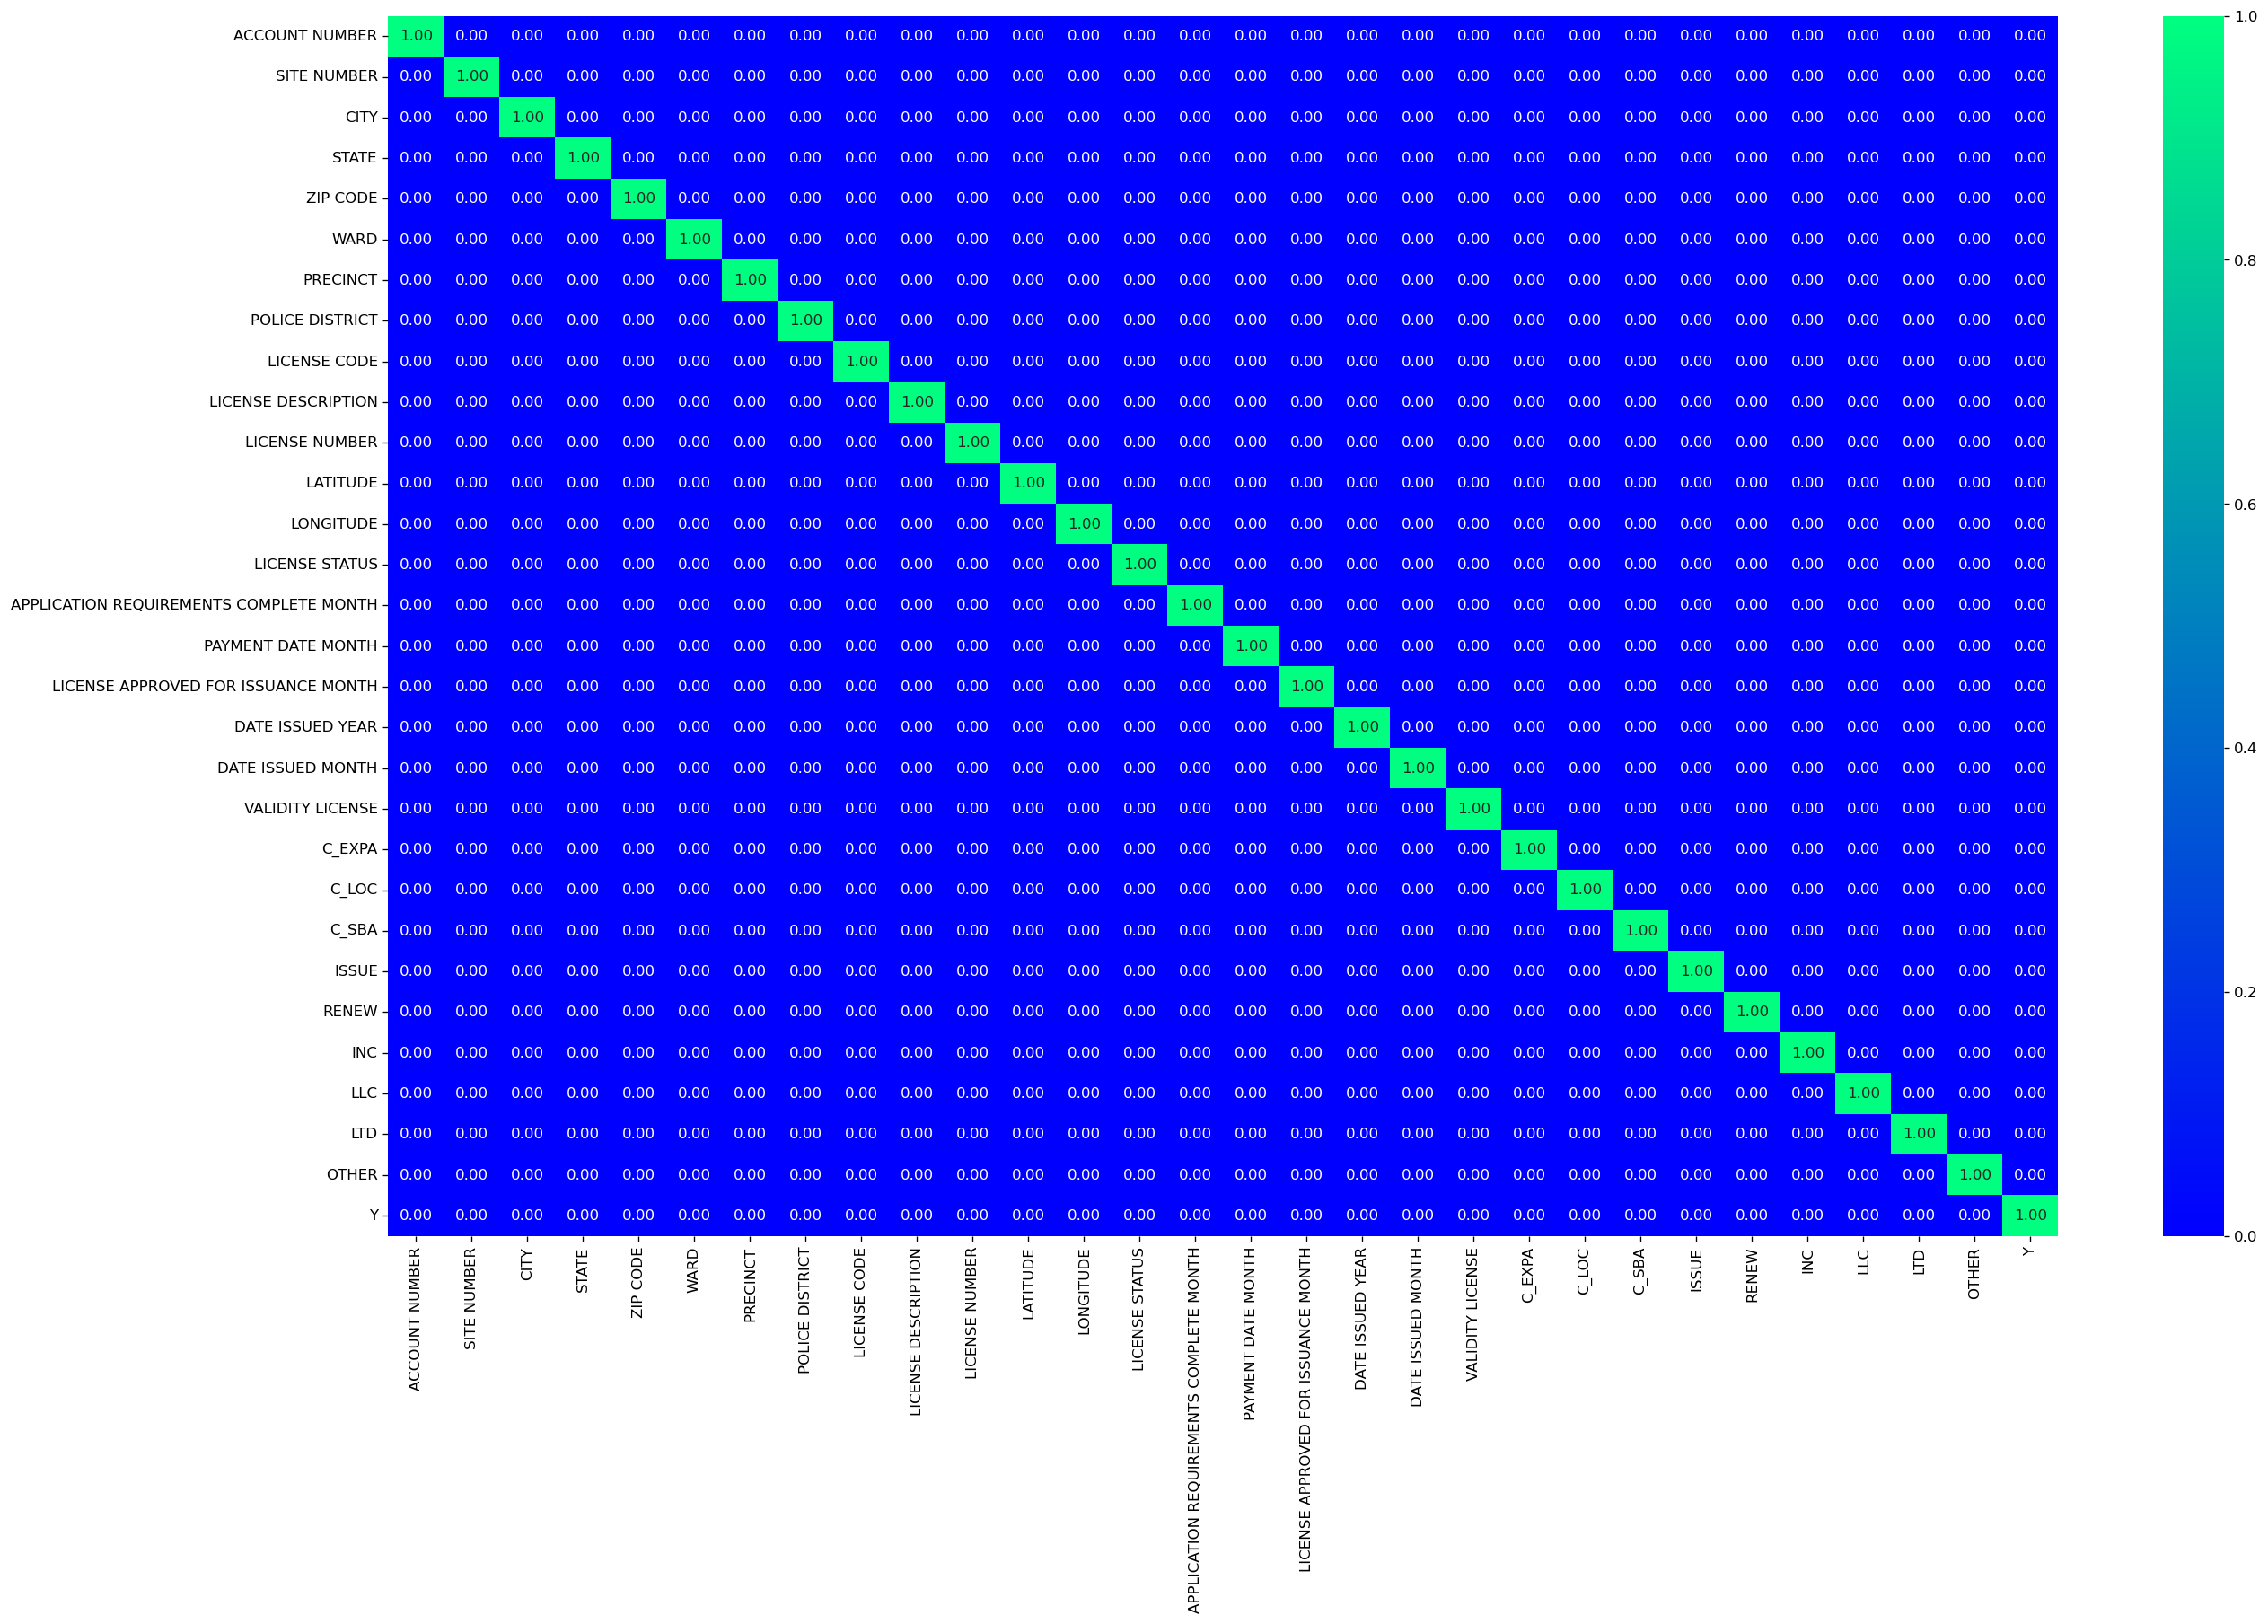

In [158]:
fig , ax = plt.subplots(figsize = (25,15),dpi=120)

ax = sns.heatmap(df2.corr() >0.9 , annot =True, fmt='.2f', cmap ='winter' )

In [159]:
df2

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,32811,1,211,16,1529,22.0,28.0,10.0,1010,55,35342.0,41.843613,-87.714618,1,6.0,8.0,8.0,2006,4,1.0,0,0,0,0,1,0,0,0,1,0
1,262311,29,211,16,1524,33.0,23.0,17.0,1315,61,1358463.0,41.961132,-87.699626,0,9.0,11.0,4.0,2006,6,1.0,0,0,0,0,1,1,0,0,0,0
2,345008,1,498,16,1232,0.0,0.0,0.0,1011,40,1980233.0,42.000000,-88.000000,1,7.0,7.0,7.0,2009,7,2.0,0,0,0,1,0,1,0,0,0,0
3,273121,1,624,16,1404,0.0,0.0,0.0,1010,55,1476582.0,42.000000,-88.000000,1,2.0,2.0,2.0,2004,2,1.0,0,0,0,1,0,0,0,0,0,0
4,213785,1,1227,16,1273,0.0,0.0,0.0,1010,55,1141408.0,42.000000,-88.000000,1,3.0,6.0,6.0,2008,6,2.0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,266103,3,211,16,301,18.0,14.0,8.0,1010,55,1743194.0,41.749842,-87.688733,-1,6.0,9.0,9.0,2007,9,2.3,0,0,0,0,1,1,0,0,0,0
57235,63376,180,211,16,303,42.0,22.0,18.0,1002,0,2032383.0,41.891055,-87.627898,-1,5.0,6.0,6.0,2016,8,2.0,0,0,0,0,1,0,1,0,0,0
57236,55051,1,211,16,306,44.0,9.0,19.0,1010,55,40376.0,41.943382,-87.659191,-1,12.0,1.0,1.0,2002,1,1.0,0,0,0,0,1,0,0,0,1,0
57237,357381,1,211,16,289,23.0,18.0,8.0,1012,39,2064176.0,41.775710,-87.798009,-1,9.0,12.0,12.0,2012,12,2.0,0,0,0,0,1,1,0,0,0,0


# Splitting data into train data and test data 

In [80]:
df2
df3 = df2.iloc[:len(df_train),:]
df_test2 = df2.iloc[len(df_train):,:].drop('LICENSE STATUS',axis=1)

In [81]:
len(df3) , len(df_test2)

(85895, 57239)

In [82]:
df3

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,LICENSE STATUS,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,32811,1,211,16,1529,22.0,28.0,10.0,1010,55,35342.0,41.843613,-87.714618,1,6.0,8.0,8.0,2006,4,1.0,0,0,0,0,1,0,0,0,1,0
1,262311,29,211,16,1524,33.0,23.0,17.0,1315,61,1358463.0,41.961132,-87.699626,0,9.0,11.0,4.0,2006,6,1.0,0,0,0,0,1,1,0,0,0,0
2,345008,1,498,16,1232,0.0,0.0,0.0,1011,40,1980233.0,42.000000,-88.000000,1,7.0,7.0,7.0,2009,7,2.0,0,0,0,1,0,1,0,0,0,0
3,273121,1,624,16,1404,0.0,0.0,0.0,1010,55,1476582.0,42.000000,-88.000000,1,2.0,2.0,2.0,2004,2,1.0,0,0,0,1,0,0,0,0,0,0
4,213785,1,1227,16,1273,0.0,0.0,0.0,1010,55,1141408.0,42.000000,-88.000000,1,3.0,6.0,6.0,2008,6,2.0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,8011,1,211,16,1513,11.0,28.0,1.0,1008,38,12652.0,41.863501,-87.642210,0,3.0,5.0,5.0,2012,5,2.0,0,0,0,0,1,0,0,0,1,0
85891,317725,1,667,16,1634,0.0,0.0,0.0,1800,12,1821421.0,42.000000,-88.000000,1,5.0,5.0,5.0,2007,5,2.1,0,0,0,1,0,1,0,0,0,0
85892,8458,2,296,16,1464,0.0,0.0,0.0,1010,55,74137.0,42.000000,-88.000000,1,11.0,1.0,1.0,2009,12,2.0,0,0,0,0,1,0,1,0,0,0
85893,2156,43,211,16,1537,23.0,0.0,0.0,1010,55,2049545.0,41.799012,-87.723181,0,8.0,10.0,10.0,2011,10,2.0,0,0,0,0,1,0,0,0,0,0


In [83]:
df_test2

,ACCOUNT NUMBER,SITE NUMBER,CITY,STATE,ZIP CODE,WARD,PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,LATITUDE,LONGITUDE,APPLICATION REQUIREMENTS COMPLETE MONTH,PAYMENT DATE MONTH,LICENSE APPROVED FOR ISSUANCE MONTH,DATE ISSUED YEAR,DATE ISSUED MONTH,VALIDITY LICENSE,C_EXPA,C_LOC,C_SBA,ISSUE,RENEW,INC,LLC,LTD,OTHER,Y
0,280120,1,211,16,262,42.0,67.0,18.0,1020,96,1516615.0,41.890047,-87.637467,12.0,1.0,1.0,2012,1,2.0,0,0,0,0,1,0,1,0,0,0
1,65043,1,211,16,287,16.0,5.0,7.0,1010,55,69813.0,41.786485,-87.676665,4.0,11.0,11.0,2012,11,2.0,0,0,0,0,1,1,0,0,0,0
2,281270,1,211,16,257,4.0,8.0,1.0,1020,96,1519227.0,41.868269,-87.625695,9.0,12.0,12.0,2004,12,1.0,0,0,0,0,1,0,1,0,0,0
3,335243,1,211,16,318,9.0,33.0,5.0,1607,82,1922025.0,41.655762,-87.608686,6.0,11.0,6.0,2010,11,2.0,0,0,0,0,1,0,0,0,1,0
4,283018,3,211,16,283,15.0,26.0,9.0,1010,55,1675683.0,41.816969,-87.699785,6.0,8.0,8.0,2007,8,1.8,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57234,266103,3,211,16,301,18.0,14.0,8.0,1010,55,1743194.0,41.749842,-87.688733,6.0,9.0,9.0,2007,9,2.3,0,0,0,0,1,1,0,0,0,0
57235,63376,180,211,16,303,42.0,22.0,18.0,1002,0,2032383.0,41.891055,-87.627898,5.0,6.0,6.0,2016,8,2.0,0,0,0,0,1,0,1,0,0,0
57236,55051,1,211,16,306,44.0,9.0,19.0,1010,55,40376.0,41.943382,-87.659191,12.0,1.0,1.0,2002,1,1.0,0,0,0,0,1,0,0,0,1,0
57237,357381,1,211,16,289,23.0,18.0,8.0,1012,39,2064176.0,41.775710,-87.798009,9.0,12.0,12.0,2012,12,2.0,0,0,0,0,1,1,0,0,0,0


In [84]:
df3.to_csv("df3.csv",index=False)
df_test2.to_csv("df_test2.csv",index=False)

In [85]:
df3=pd.read_csv("df3.csv")
df_test2=pd.read_csv("df_test2.csv")

## Balancing the imbalanced dataset

In [87]:
from sklearn.model_selection import train_test_split, cross_val_score

In [88]:
X = df3.drop('LICENSE STATUS', axis=1)
y = df3['LICENSE STATUS']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.25)

In [90]:
# # Since we have very less amount of class 3,2, we nned to oversample those
# # AAI    55400 --1
# # AAC    30200 --0
# # REV      290 -- 4
# # REA        3 --3 
# # INQ        2  --2 

# # df_AAI = df3[df3['LICENSE STATUS'] == 1][:1500]
# # df_AAC = df3[df3['LICENSE STATUS'] == 0][:1000]

# # df_REV = df3[df3['LICENSE STATUS'] == 4]

# df_INQ = df3[df3['LICENSE STATUS'] == 2]
# df_REA = df3[df3['LICENSE STATUS'] == 3]

# df_int = pd.concat([df_INQ, df_REA]* 20 )
# df_int2 = pd.concat([df_REV]* 1 )
# df4 = pd.concat([df_AAI,df_AAC,df_int,df_int2])
# # df4 = df4.sample(frac=1, random_state=42)
# df4

In [91]:
# df4 = df4.sample(frac=1, random_state=42)

### Oversampling

In [92]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
over_sampler = RandomOverSampler()
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y)}")

Training target statistics: Counter({0: 41558, 1: 41558, 4: 41558, 2: 41558, 3: 41558})
Testing target statistics: Counter({1: 55400, 0: 30200, 4: 290, 3: 3, 2: 2})


In [93]:
y_res.value_counts()

0    41558
1    41558
4    41558
2    41558
3    41558
Name: LICENSE STATUS, dtype: int64

In [101]:
y_train.value_counts()

1    41558
0    22623
4      235
3        3
2        2
Name: LICENSE STATUS, dtype: int64

### SMOTE

In [116]:
from imblearn.over_sampling import SMOTE

In [117]:
class_weight = {1:y_train.value_counts()[1],0:y_train.value_counts()[0],4:15000,2:12000,3:10000}
sm = SMOTE(k_neighbors=1 , sampling_strategy=class_weight)

In [119]:
X_bal, y_bal = sm.fit_resample(X_train, y_train)

# X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_bal)))

The number of classes before fit Counter({1: 41558, 0: 22623, 4: 235, 3: 3, 2: 2})
The number of classes after fit Counter({1: 41558, 0: 22623, 4: 15000, 2: 12000, 3: 10000})


In [120]:
y_bal.value_counts()

1    41558
0    22623
4    15000
2    12000
3    10000
Name: LICENSE STATUS, dtype: int64

In [121]:
# from imblearn.combine import SMOTEENN
# sm = SMOTEENN()
# X_bal_enn, y_bal_enn = sm.fit_resample(X, y)
# y_bal_enn.value_counts()

# Modelling

### Standardization - not applied as not many numerical features

In [107]:
# from sklearn.preprocessing import StandardScaler

# # copy of datasets
# X_train_stand = X_train.copy()
# X_test_stand = X_test.copy()

# # numerical features
# num_cols = ['ACCOUNT NUMBER','SITE NUMBER','CITY','STATE','ZIP CODE']

# # apply standardization on numerical features
# for i in num_cols:
    
#     # fit on training data column
#     scale = StandardScaler().fit(X_train_stand[[i]])
    
#     # transform the training data column
#     X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
#     # transform the testing data column
#     X_test_stand[i] = scale.transform(X_test_stand[[i]])


### Baseline Predictions

**Importing Models libraries**

In [108]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Applying basic Models for baseline

In [109]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression() ,
          "KNN": KNeighborsClassifier() ,
          "Naive Bayes" : GaussianNB() ,
          "Decision Tree" : DecisionTreeClassifier() 
           }

In [110]:
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
#     np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    model_f1 = {}
    y_pred={}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        y_pred[name] = model.predict(X_test)
        print(name)
        print(confusion_matrix(y_test,y_pred[name]))
        print("f1",f1_score(y_test, y_pred[name], average="weighted"))
        print("prec",precision_score(y_test, y_pred[name], average="weighted"))
        print("rec",recall_score(y_test, y_pred[name], average="weighted"))    
        print(classification_report(y_test, y_pred[name]))
        
    return model_scores

# Performance wrt imbalanced dataset

In [112]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

Logistic Regression
[[  635  6942     0]
 [  527 13315     0]
 [    1    54     0]]
f1 0.5538781911381079
prec 0.615221318913387
rec 0.6496227996647108
              precision    recall  f1-score   support

           0       0.55      0.08      0.15      7577
           1       0.66      0.96      0.78     13842
           4       0.00      0.00      0.00        55

    accuracy                           0.65     21474
   macro avg       0.40      0.35      0.31     21474
weighted avg       0.62      0.65      0.55     21474

KNN
[[ 4993  2582     2]
 [ 2008 11833     1]
 [   45     8     2]]
f1 0.7808392960221615
prec 0.7799019589774343
rec 0.7836453385489429
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      7577
           1       0.82      0.85      0.84     13842
           4       0.40      0.04      0.07        55

    accuracy                           0.78     21474
   macro avg       0.64      0.52      0.53     21474
weig

{'Logistic Regression': 0.6496227996647108,
 'KNN': 0.7836453385489429,
 'Naive Bayes': 0.7475086150693863,
 'Decision Tree': 0.8936853869796032}

In [114]:
{'Logistic Regression': 0.6464096116233585,
 'KNN': 0.7859271677377293,
 'Naive Bayes': 0.7202663686318338,
 'Decision Tree': 0.8941044984632579}

{'Logistic Regression': 0.6464096116233585,
 'KNN': 0.7859271677377293,
 'Naive Bayes': 0.7202663686318338,
 'Decision Tree': 0.8941044984632579}

## Performance wrt balanced dataset - SMOTE

In [122]:
model_scores = fit_and_score(models=models,
                             X_train=X_bal,
                             X_test=X_test,
                             y_train=y_bal,
                             y_test=y_test)

model_scores

Logistic Regression
[[    0  7469   108     0]
 [    0 13722   120     0]
 [    0     0     0     0]
 [    0    54     1     0]]
f1 0.5041816902929662
prec 0.4163385024078443
rec 0.6390053087454596
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7577
           1       0.65      0.99      0.78     13842
           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        55

    accuracy                           0.64     21474
   macro avg       0.16      0.25      0.20     21474
weighted avg       0.42      0.64      0.50     21474

KNN
[[ 4774  2520    31   252]
 [ 1942 11780    19   101]
 [    0     0     0     0]
 [   32     6     0    17]]
f1 0.7749134041376434
prec 0.7805228122524981
rec 0.7716773772934712
              precision    recall  f1-score   support

           0       0.71      0.63      0.67      7577
           1       0.82      0.85      0.84     13842
           3       0.0

{'Logistic Regression': 0.6390053087454596,
 'KNN': 0.7716773772934712,
 'Naive Bayes': 0.4648877712582658,
 'Decision Tree': 0.8886094812331191}

In [123]:
{'Logistic Regression': 0.6465493154512434,
 'KNN': 0.77717239452361,
 'Naive Bayes': 0.4639564124056999,
 'Decision Tree': 0.8901927912824812}

{'Logistic Regression': 0.6465493154512434,
 'KNN': 0.77717239452361,
 'Naive Bayes': 0.4639564124056999,
 'Decision Tree': 0.8901927912824812}

#### Few Observations found
- Imbalanced dataset would not perform good and give F1 score due to imbalanced classes 
- Logistic Reg and Naive Bayes are not giving better result , hence better not use them

In [124]:
# X.sample(500).iloc[:,:5,]

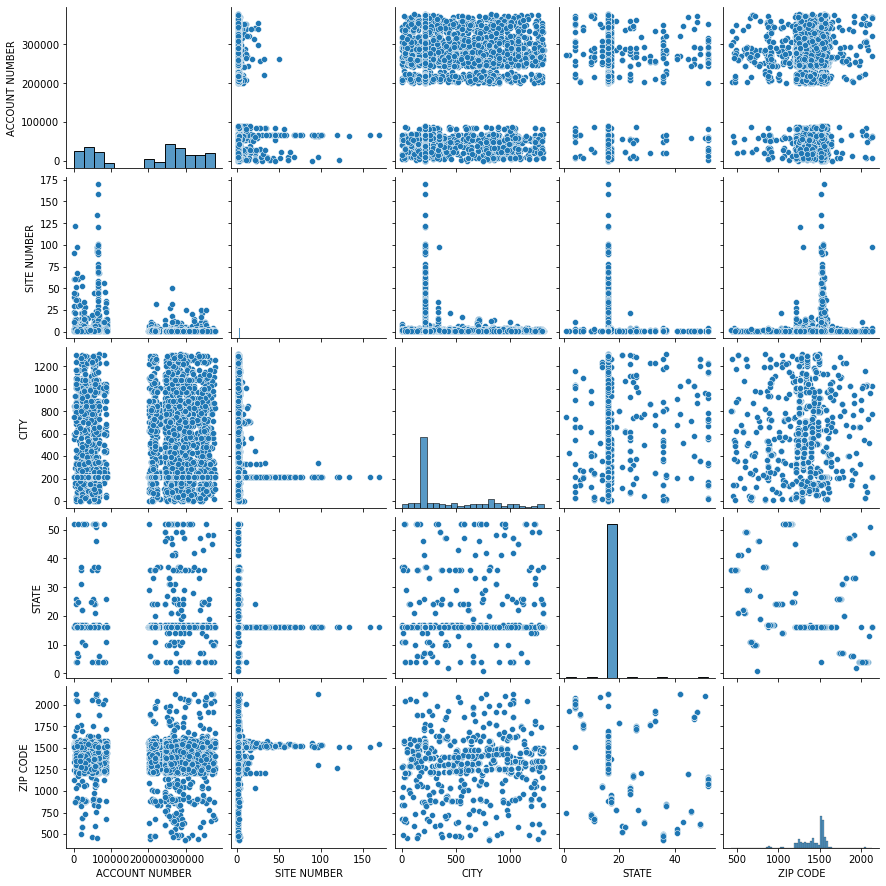

In [138]:
sns.pairplot(X.sample(5000).iloc[:,:5] );

**We see here the dataset has lot of overlapping hence not linierly seperable , that's why probably LR didn't performend well and KNN performing good**

In [126]:
## apply ensembling methods as well 

### Ensembling wrt imbalanced -Smote

In [127]:
from catboost import CatBoostClassifier
from xgboost import XGBClassifier


In [128]:
class_weight = {1:1,0:1,4:50,2:800,3:1000}

In [129]:
# Put models in a dictionary
models = { "Random Forest": RandomForestClassifier(class_weight = class_weight)   ,
            "Catboost": CatBoostClassifier(verbose = False,loss_function='MultiClass') ,
              "Xgboost": XGBClassifier(verbosity =0, objective='multi:softmax') }

In [130]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

Random Forest
[[ 7036   536     5]
 [  861 12981     0]
 [   43     1    11]]
f1 0.9324376719844778
prec 0.9334204446480822
rec 0.9326627549594859
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.69      0.20      0.31        55

    accuracy                           0.93     21474
   macro avg       0.84      0.69      0.72     21474
weighted avg       0.93      0.93      0.93     21474

Catboost
[[ 7003   566     8]
 [  819 13023     0]
 [   34     2    19]]
f1 0.9334097670617484
prec 0.9339902897266005
rec 0.9334544099841668
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.70      0.35      0.46        55

    accuracy                           0.93     21474
   macro avg       0.85      0.74      0.77     21474
weig

{'Random Forest': 0.9326627549594859,
 'Catboost': 0.9334544099841668,
 'Xgboost': 0.9334078420415386}

In [131]:
{'Random Forest': 0.9312191487380087,
 'Catboost': 0.9318245319921766,
 'Xgboost': 0.9320108037626897}

{'Random Forest': 0.9312191487380087,
 'Catboost': 0.9318245319921766,
 'Xgboost': 0.9320108037626897}

## WRT balanced , Although it deosn't effect much as ensembling is not much effected by imbalanced dataset due to herarchial structure

In [132]:
# Put models in a dictionary
models = { "Random Forest": RandomForestClassifier(class_weight = class_weight)   ,
            "Catboost": CatBoostClassifier(verbose = False,loss_function='MultiClass') ,
              "Xgboost": XGBClassifier(verbosity =0, objective='multi:softmax') }

In [133]:
model_scores = fit_and_score(models=models,
                             X_train=X_bal,
                             X_test=X_test,
                             y_train=y_bal,
                             y_test=y_test)

model_scores

Random Forest
[[ 7016   544    17]
 [  869 12973     0]
 [   39     1    15]]
f1 0.9315700573069708
prec 0.9322194704326118
rec 0.9315451243364068
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.47      0.27      0.34        55

    accuracy                           0.93     21474
   macro avg       0.77      0.71      0.73     21474
weighted avg       0.93      0.93      0.93     21474

Catboost
[[ 6964   562    51]
 [  818 13022     2]
 [   28     1    26]]
f1 0.9324723044938487
prec 0.9333468219729256
rec 0.9319176678774331
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.33      0.47      0.39        55

    accuracy                           0.93     21474
   macro avg       0.73      0.78      0.75     21474
weig

{'Random Forest': 0.9315451243364068,
 'Catboost': 0.9319176678774331,
 'Xgboost': 0.9329421626152556}

In [164]:
{'Random Forest': 0.9315451243364068,
 'Catboost': 0.9319176678774331,
 'Xgboost': 0.9329421626152556}

{'Random Forest': 0.9315451243364068,
 'Catboost': 0.9319176678774331,
 'Xgboost': 0.9329421626152556}

**Hence we conclude that best models which are performing are RandomForest, catboost and xgboost , will consider xgboost and Random forest for hyperparamenter tuning** 

# Hyperparameter Tuning

### Random Forest

In [165]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [166]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_pred_rf
print("f1",f1_score(y_test, y_pred_rf, average="weighted"))
print("prec",precision_score(y_test, y_pred_rf, average="weighted"))
print("rec",recall_score(y_test, y_pred_rf, average="weighted"))    
print(classification_report(y_test, y_pred_rf))


f1 0.9321675955791354
prec 0.9333007159530693
rec 0.9323833473037161
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.80      0.22      0.34        55

    accuracy                           0.93     21474
   macro avg       0.88      0.69      0.73     21474
weighted avg       0.93      0.93      0.93     21474



In [167]:
print(model_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


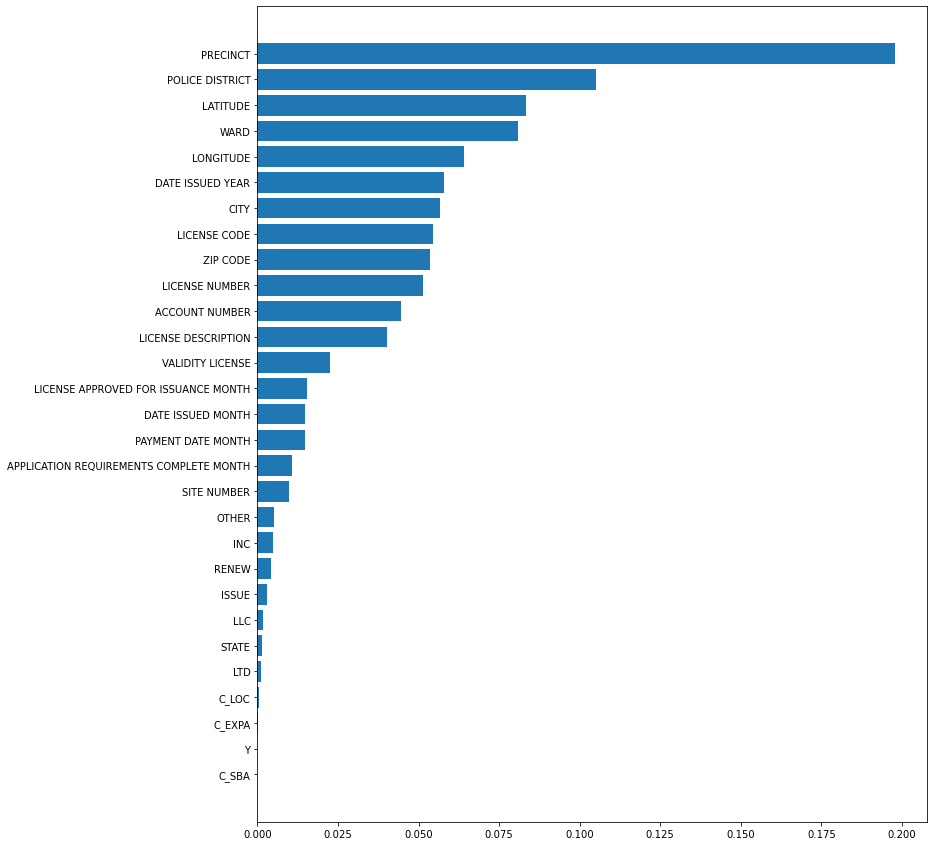

In [168]:
fig, ax = plt.subplots(figsize=(12,15))
sorted_idx = model_rf.feature_importances_.argsort()

plt.barh(X.columns[sorted_idx], model_rf.feature_importances_[sorted_idx]);

In [172]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(100, 300, 100),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(2, 10, 2),
           "min_samples_leaf": np.arange(1, 6, 2),
           "class_weight":[class_weight]}

In [173]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=5,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=5,
                   param_distributions={'class_weight': [{0: 1, 1: 1, 2: 800,
                                                          3: 1000, 4: 50}],
                                        'max_depth': [None, 3, 5],
                                        'min_samples_leaf': array([1, 3, 5]),
                                        'min_samples_split': array([2, 4, 6, 8]),
                                        'n_estimators': array([100, 200])},
                   verbose=True)

In [174]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': None,
 'class_weight': {1: 1, 0: 1, 4: 50, 2: 800, 3: 1000}}

In [175]:
y_preds = rs_rf.predict(X_test)

In [176]:
print("f1",f1_score(y_test, y_preds, average="weighted"))
print(classification_report(y_test, y_preds))

f1 0.9323916638998285
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.56      0.25      0.35        55

    accuracy                           0.93     21474
   macro avg       0.80      0.71      0.74     21474
weighted avg       0.93      0.93      0.93     21474



## Hyperparamter Tuning with GridSearchCV



In [179]:
# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": [100,200],
           "max_depth": [None],
           "min_samples_split": [2],
           "min_samples_leaf": [3,4],
          "class_weight":[class_weight]}

In [180]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [181]:
gs_rf.best_params_

{'class_weight': {1: 1, 0: 1, 4: 50, 2: 800, 3: 1000},
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [182]:
y_preds = gs_rf.predict(X_test)

In [183]:
print("f1",f1_score(y_test, y_preds, average="weighted"))
print(classification_report(y_test, y_preds))

f1 0.9326847311670616
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.60      0.33      0.42        55

    accuracy                           0.93     21474
   macro avg       0.82      0.73      0.76     21474
weighted avg       0.93      0.93      0.93     21474



### WRT balanced

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_rf.fit(X_bal, y_bal);

In [ ]:
gs_rf.best_params_

In [ ]:
y_preds = gs_rf.predict(X_test)

In [ ]:
print("f1",f1_score(y_test, y_preds, average="weighted"))
print(classification_report(y_test, y_preds))

## XGboost Hyperparamter Tuning

In [184]:
model_xg = XGBClassifier()
model_xg.fit(X_train, y_train)
y_pred_xg = model_xg.predict(X_test)
y_pred_xg
print("f1",f1_score(y_test, y_pred_xg, average="weighted"))
print("prec",precision_score(y_test, y_pred_xg, average="weighted"))
print("rec",recall_score(y_test, y_pred_xg, average="weighted"))    
print(classification_report(y_test, y_pred_xg))
print(model_xg.get_params())

f1 0.9334783900994958
prec 0.933917519412617
rec 0.9334078420415386
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.58      0.40      0.47        55

    accuracy                           0.93     21474
   macro avg       0.81      0.75      0.78     21474
weighted avg       0.93      0.93      0.93     21474

{'objective': 'multi:softprob', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.300000012, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monoton

In [185]:
xg_grid  = {"learning_rate"    : [ 0.02, 0.05, 0.10 ] ,
            "n_estimators"    : [100, 500, 1000 ] ,
 "max_depth"        : [  4, 6, 8],
 "min_child_weight" : [ 1, 3 ],
 "gamma"            : [ 0.0, 0.1],
 "colsample_bytree" : [ 0.5 ,1 , 2 ] ,
 "objective" : ['multi:softmax' ] }

In [186]:
rs_xg = RandomizedSearchCV(XGBClassifier(n_jobs=-1), 
                           param_distributions=xg_grid,
                           cv=5,
                           n_iter=5,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_xg.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=-1,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=5,
                   param_distributions={'colsample_bytree': [0.5, 1, 2],
                                        'gamma': [0.0, 0.1],
                                        'learning_rate': [0.02, 0.05, 0.1],
                                        'max_depth': [4, 6, 8],
                                        'min_child_weight': [1, 3],
                                        'n_estimators': [100, 500, 1000],
                                        'objective': ['multi:softmax']},
                   verbose=True)

In [187]:
# Find the best hyperparameters
rs_xg.best_params_

{'objective': 'multi:softmax',
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.02,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [188]:
y_preds = rs_xg.predict(X_test)

In [189]:
print("f1",f1_score(y_test, y_preds, average="weighted"))
print(classification_report(y_test, y_preds))

f1 0.9342595356414082
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.59      0.36      0.45        55

    accuracy                           0.93     21474
   macro avg       0.81      0.74      0.77     21474
weighted avg       0.93      0.93      0.93     21474



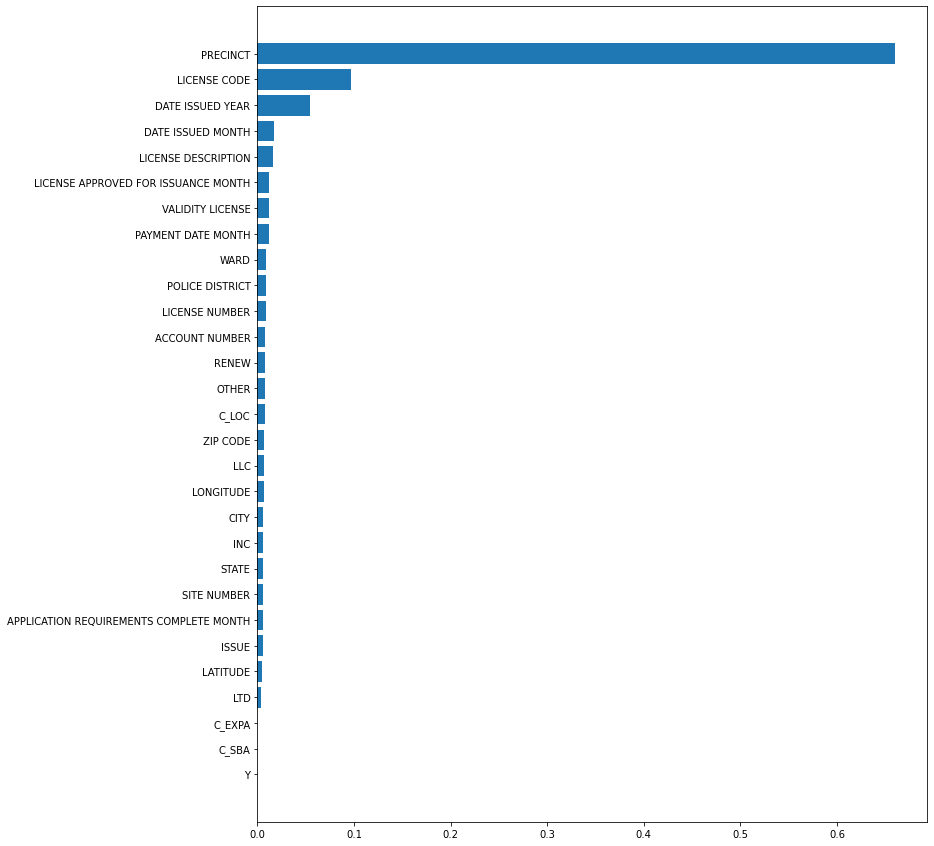

In [190]:
fig, ax = plt.subplots(figsize=(12,15))
sorted_idx = model_xg.feature_importances_.argsort()

plt.barh(X.columns[sorted_idx], model_xg.feature_importances_[sorted_idx]);

## Hyperparamter Tuning with GridSearchCV



In [ ]:
xg_grid  = {"learning_rate"    : [ 0.02, 0.04 ] ,
             "n_estimators"    : [1000 ] ,
 "max_depth"        : [  6, 8 ],
 "min_child_weight" : [ 1],
 "gamma"            : [ 0.1],
 "colsample_bytree" : [ 1 , 0.5 ] ,
 "objective" : ['multi:softmax' ] }

In [ ]:
# 'n_estimators': 1000,
#  'min_child_weight': 1,
#  'max_depth': 6,
#  'learning_rate': 0.02,
#  'gamma': 0.1,
#  'colsample_bytree': 0.5

In [ ]:
gs_xg = GridSearchCV(XGBClassifier(),
                          param_grid=xg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_xg.fit(X_train, y_train);

In [ ]:
gs_xg.best_params_

In [ ]:
y_preds = gs_xg.predict(X_test)

In [ ]:
print("f1",f1_score(y_test, y_preds, average="weighted"))
print(classification_report(y_test, y_preds))

### WRT balanced

In [ ]:
gs_xg = GridSearchCV(XGBClassifier(),
                          param_grid=xg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_xg.fit(X_bal, y_bal);

In [ ]:
gs_xg.best_params_

In [ ]:
y_preds = gs_xg.predict(X_test)

In [ ]:
print("f1",f1_score(y_test, y_preds, average="weighted"))
print(classification_report(y_test, y_preds))

## Hence we got our best perorming models and F1 scores, Now treating test data and trying to get predictions

### RF

In [191]:
model_rf = RandomForestClassifier(n_estimators= 500,min_samples_split= 2,min_samples_leaf= 3,max_depth= None)
model_rf.fit(X_bal, y_bal)
y_pred_rf = model_rf.predict(X_test)
y_pred_rf
print("f1",f1_score(y_test, y_pred_rf, average="weighted"))
print("prec",precision_score(y_test, y_pred_rf, average="weighted"))
print("rec",recall_score(y_test, y_pred_rf, average="weighted"))    
print(classification_report(y_test, y_pred_rf))


f1 0.9326604122726675
prec 0.9335137853956403
rec 0.9326627549594859
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.56      0.27      0.37        55

    accuracy                           0.93     21474
   macro avg       0.80      0.71      0.74     21474
weighted avg       0.93      0.93      0.93     21474



In [192]:
#  'max_depth': None,
#  'min_samples_leaf': 3,
#  'min_samples_split': 2,
#  'n_estimators': 200

In [193]:
# y_pred_rf = rs_rf.predict(df_test2)
# y_pred_rf
y_pred_rf = model_rf.predict(df_test2)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [194]:
my_submission2 = pd.DataFrame({'ID': df_test.ID})
my_submission2.head()
my_submission2['LICENSE STATUS'] = y_pred_rf
my_submission2

,ID,LICENSE STATUS
0,1516615-20120216,0
1,69813-20110616,0
2,1519227-20041116,0
3,1922025-20100816,0
4,1675683-20070816,0
...,...,...
57234,1743194-20070816,0
57235,2032383-20160716,0
57236,40376-20020216,0
57237,2064176-20121116,0


In [195]:
my_submission2['LICENSE STATUS'] = my_submission2['LICENSE STATUS'].replace(1, 'AAI')
my_submission2['LICENSE STATUS'] = my_submission2['LICENSE STATUS'].replace(0, 'AAC')
my_submission2['LICENSE STATUS'] = my_submission2['LICENSE STATUS'].replace(4, 'REV')
my_submission2['LICENSE STATUS'] = my_submission2['LICENSE STATUS'].replace(3, 'REA')
my_submission2['LICENSE STATUS'] = my_submission2['LICENSE STATUS'].replace(2, 'INQ')

In [196]:
my_submission2['LICENSE STATUS'].value_counts()

AAC    55445
AAI     1449
REV      345
Name: LICENSE STATUS, dtype: int64

In [197]:
# Saving predictions to file
my_submission2.to_csv('submission_rf.csv', index=False)


### XG

In [199]:
model_xg = XGBClassifier(learning_rate=0.02, n_estimators=1000, objective='multi:softmax', silent=True, nthread=1, num_class=5)
model_xg.fit(X_bal, y_bal)
y_pred_xg = model_xg.predict(X_test)
y_pred_xg
print("f1",f1_score(y_test, y_pred_xg, average="weighted"))
print("prec",precision_score(y_test, y_pred_xg, average="weighted"))
print("rec",recall_score(y_test, y_pred_xg, average="weighted"))    
print(classification_report(y_test, y_pred_xg))
print(model_xg.get_params())

f1 0.9328780873328464
prec 0.933737918591595
rec 0.9323833473037161
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7577
           1       0.96      0.94      0.95     13842
           4       0.38      0.51      0.43        55

    accuracy                           0.93     21474
   macro avg       0.74      0.79      0.76     21474
weighted avg       0.93      0.93      0.93     21474

{'objective': 'multi:softmax', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.02, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 6, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constr

In [200]:
# 'objective': 'multi:softmax',
#  'min_child_weight': 1,
#  'max_depth': 6,
#  'learning_rate': 0.3,
#  'gamma': 0.1,
#  'colsample_bytree': 1

In [201]:
y_pred_xg = rs_xg.predict(df_test2)
y_pred_xg

array([0, 0, 0, ..., 0, 0, 0])

In [202]:
my_submission = pd.DataFrame({'ID': df_test.ID})
my_submission.head()

,ID
0,1516615-20120216
1,69813-20110616
2,1519227-20041116
3,1922025-20100816
4,1675683-20070816


In [203]:
my_submission['LICENSE STATUS'] = y_pred_xg
my_submission

,ID,LICENSE STATUS
0,1516615-20120216,0
1,69813-20110616,0
2,1519227-20041116,0
3,1922025-20100816,0
4,1675683-20070816,0
...,...,...
57234,1743194-20070816,0
57235,2032383-20160716,0
57236,40376-20020216,0
57237,2064176-20121116,0


In [204]:
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(1, 'AAI')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(0, 'AAC')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(4, 'REV')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(3, 'REA')
my_submission['LICENSE STATUS'] = my_submission['LICENSE STATUS'].replace(2, 'INQ')

In [205]:
my_submission

,ID,LICENSE STATUS
0,1516615-20120216,AAC
1,69813-20110616,AAC
2,1519227-20041116,AAC
3,1922025-20100816,AAC
4,1675683-20070816,AAC
...,...,...
57234,1743194-20070816,AAC
57235,2032383-20160716,AAC
57236,40376-20020216,AAC
57237,2064176-20121116,AAC


In [208]:
my_submission['LICENSE STATUS'].value_counts()

AAC    51367
REV     3069
AAI     2803
Name: LICENSE STATUS, dtype: int64

In [207]:
# Saving predictions to file
my_submission.to_csv('submission_xg.csv', index=False)
